<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [1]:
#pip install lazypredict
#pip install googletrans==4.0.0-rc1
#pip install textblob
#pip install vaderSentiment

In [2]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [3]:
dicionario_mes_2021 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}
dicionario_mes_2020 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dez':'12'}

In [4]:
df = pd.DataFrame()

for i in dicionario_mes_2020.keys():
    arquivo = "dataset-2020/" + dicionario_mes_2020[i] + "_GoogleNews_Petr_" + i + "-2020.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

for i in dicionario_mes_2021.keys():
    arquivo = "dataset-2021/" + dicionario_mes_2021[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

    

In [5]:
df.head()

title                 media  \
0  Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...   Correio Braziliense   
1  Preço do etanol fecha 2019 em alta de 11,5% na...  Diario de Pernambuco   
2  Série "Cineastas" e mais dicas para curtir na ...                   GZH   
3  Feriados em 2020: 11 datas serão em dias da se...           Money Times   
4  O incêndio que matou quase todos os macacos em...                   BBC   

         date                                               desc  
0  01/01/2020  O dinheiro que será distribuído veio do leilão...  
1  01/01/2020  O diesel foi o segundo combustível com maior a...  
2  01/01/2020  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3  01/01/2020  O dia 29 de fevereiro cairá em um sábado. Veja...  
4  01/01/2020  Principais notícias. Como a Petrobras virou te...

In [6]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [7]:
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro_2020 = pd.read_csv('dataset-2020/Hist_Preço_Petr_2020_.csv', sep='|')
df_petro = df_petro_2020.append(df_petro,ignore_index=True)
df_petro.head()

Date  Adj Close    Volume  Var%
0  2020-01-02      20.47  37774500  0.02
1  2020-01-03      20.30  71595600 -0.01
2  2020-01-06      20.54  81844000  0.01
3  2020-01-07      20.46  32822000 -0.00
4  2020-01-08      20.33  48215600 -0.01

In [8]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [9]:
df.date.value_counts()

2021-10-06    10
2021-12-12    10
2020-11-25    10
2021-02-12    10
2021-05-02    10
              ..
2020-07-06     2
2020-12-27     2
2021-08-15     2
2021-03-22     2
2021-07-25     1
Name: date, Length: 693, dtype: int64

In [10]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

index  date
0   2021-10-06    10
1   2021-12-12    10
2   2020-11-25    10
3   2021-02-12    10
4   2021-05-02    10
..         ...   ...
688 2020-07-06     2
689 2020-12-27     2
690 2021-08-15     2
691 2021-03-22     2
692 2021-07-25     1

[693 rows x 2 columns]

In [11]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [12]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

index  date
0   2021-10-06    10
1   2021-12-12    10
2   2020-11-25    10
3   2021-02-12    10
4   2021-05-02    10
..         ...   ...
688 2020-07-06     2
689 2020-12-27     2
690 2021-08-15     2
691 2021-03-22     2
692 2021-07-25     1

[693 rows x 2 columns]

In [13]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

index  date
166 2021-12-27    10
201 2021-12-28    10
438 2021-12-29    10
372 2021-12-30    10
367 2021-12-31    10

In [14]:
data_df.describe()

date
count 693.00
mean    9.32
std     1.64
min     1.00
25%    10.00
50%    10.00
75%    10.00
max    10.00

Há uma média de 9.25 (+- 2) noticias por dia

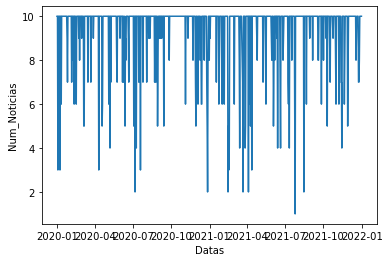

In [15]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [16]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

Num_Noticias
Mes              
1            9.36
2            9.14
3            9.09
4            9.25
5            9.51
6            9.26
7            8.93
8            9.47
9            9.66
10           9.69
11           9.29
12           9.18

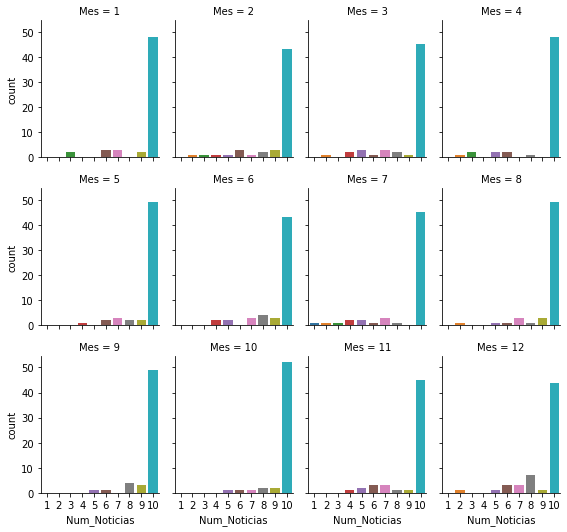

In [17]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

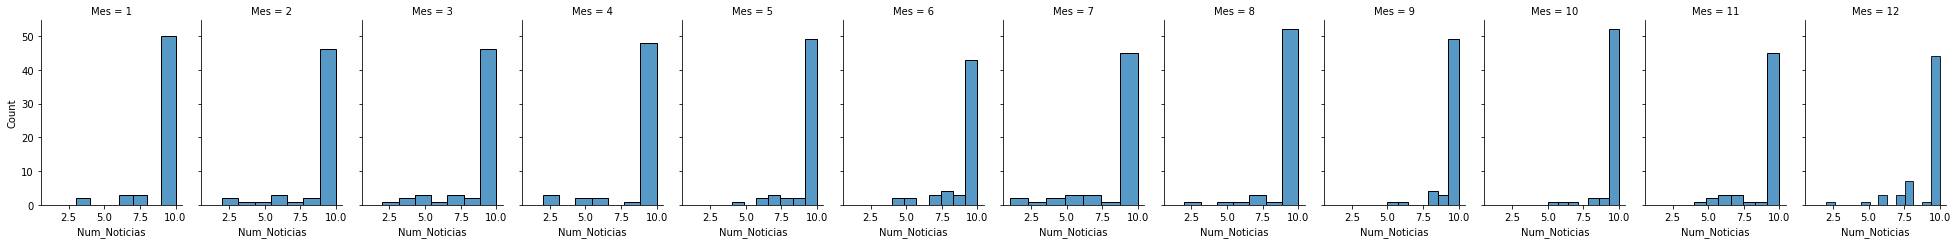

In [18]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8.6 á 9.65.

## 3.2 Há poucos dias sem noticias na base de dados

In [19]:
from datetime import datetime

In [20]:
## Gerando uma lista com todos os dias de 2021:
start_date = '01/01/2020'
end_date = '31/12/2021'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [21]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [22]:
#Gerando lista com todas as datas sem noticias em 2021
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias em 2021!" % len(datas_sem_noticias))

Há 38 dias sem notícias em 2021!


In [23]:
datas_sem_noticias

['14/01/2021',
 '15/01/2021',
 '24/01/2021',
 '27/01/2021',
 '04/02/2021',
 '04/03/2021',
 '05/03/2021',
 '09/03/2021',
 '19/03/2021',
 '02/04/2021',
 '14/04/2021',
 '20/04/2021',
 '24/04/2021',
 '12/05/2021',
 '15/05/2021',
 '23/05/2021',
 '04/06/2021',
 '19/06/2021',
 '27/06/2021',
 '01/07/2021',
 '20/07/2021',
 '22/07/2021',
 '28/07/2021',
 '30/07/2021',
 '06/08/2021',
 '08/08/2021',
 '13/08/2021',
 '09/09/2021',
 '10/09/2021',
 '04/10/2021',
 '16/10/2021',
 '23/10/2021',
 '04/11/2021',
 '21/11/2021',
 '23/11/2021',
 '29/11/2021',
 '04/12/2021',
 '19/12/2021']

Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [24]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [25]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [26]:
print("Há %s dias sem pregão em 2020 e 2021!" % len(datas_sem_pregao))

Há 236 dias sem pregão em 2020 e 2021!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [27]:
df.head()

title                 media  \
0  Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...   Correio Braziliense   
1  Preço do etanol fecha 2019 em alta de 11,5% na...  Diario de Pernambuco   
2  Série "Cineastas" e mais dicas para curtir na ...                   GZH   
3  Feriados em 2020: 11 datas serão em dias da se...           Money Times   
4  O incêndio que matou quase todos os macacos em...                   BBC   

        date                                               desc  
0 2020-01-01  O dinheiro que será distribuído veio do leilão...  
1 2020-01-01  O diesel foi o segundo combustível com maior a...  
2 2020-01-01  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3 2020-01-01  O dia 29 de fevereiro cairá em um sábado. Veja...  
4 2020-01-01  Principais notícias. Como a Petrobras virou te...

In [28]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

title                 media  \
0  pré-sal: centro oeste fica com r$ 1 bilhão dos...   Correio Braziliense   
1  preço do etanol fecha 2019 em alta de 11,5% na...  Diario de Pernambuco   
2  série "cineastas" e mais dicas para curtir na ...                   GZH   
3  feriados em 2020: 11 datas serão em dias da se...           Money Times   
4  o incêndio que matou quase todos os macacos em...                   BBC   

        date                                               desc  
0 2020-01-01  O dinheiro que será distribuído veio do leilão...  
1 2020-01-01  O diesel foi o segundo combustível com maior a...  
2 2020-01-01  Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3 2020-01-01  O dia 29 de fevereiro cairá em um sábado. Veja...  
4 2020-01-01  Principais notícias. Como a Petrobras virou te...

## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [29]:
df.iloc[2][0]

'série "cineastas" e mais dicas para curtir na tv nesta quarta-feira'

In [30]:
df.iloc[2][3]

'Cosmatos; e, por fim, às 23h15min, Rambo III (1988), de Peter MacDonald.  Especial Lenine e Petrobras Sinfônica - TV Brasil, 22h. Concerto especial  com o...'

In [31]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

title  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
...                                                 ...   
6455  quer trabalhar na petrobras? falta menos de um...   
6456                                                      
6457                                                      
6458  unigel assina contratos para suprimento das fá...   
6459                                                      

                         media       date  \
0          Correio Braziliense 2020-01-01   
1         Diario de Pernambuco 2020-01-01   
2                          GZH 2020-01-01   
3                  Money Times 2020-01-01   
4                          BBC 2020-01-01   
...                        ...        ...   
6455                 JC Online 2021-12-31   
6456                CNN Brasil 2021-12-31   
6457             PetroNotícias 2021-12-31   
6458  CPG Click Petroleo e Gas 2021-12-31   
6459       Correio Braziliense 2021-12-31   

                                                   desc  
0     O dinheiro que será distribuído veio do leilão...  
1     O diesel foi o segundo combustível com maior a...  
2     Cosmatos; e, por fim, às 23h15min, Rambo III (...  
3     O dia 29 de fevereiro cairá em um sábado. Veja...  
4     Principais notícias. Como a Petrobras virou te...  
...                                                 ...  
6455  O processo seletivo público que oferece 757 va...  
6456  Para ele, a solução desta pressão não deve pas...  
6457  Isso porque a Petrobrás anunciou que registrou...  
6458  No dia 27 de dezembro a Unigel fechou contrato...  
6459  Petrobras manterá preços de mercado, garante p...  

[6460 rows x 4 columns]

In [32]:
df = df[(df['title'] != "")]
df

title  \
10    indústria tem maior nível de emprego em 4 anos...   
11    clarissa lins, do ibp, renuncia como integrant...   
12    petrobras viverá momento de transformação nos ...   
20    governo não descarta intervir na petrobras par...   
21    postos aguardam petrobras para reajustar preço...   
...                                                 ...   
6452  aumento do preço do gás encanado: justiça inti...   
6453  presidente da petrobras diz que eleições não v...   
6454  petrobras conclui venda de ativos do rn, em me...   
6455  quer trabalhar na petrobras? falta menos de um...   
6458  unigel assina contratos para suprimento das fá...   

                            media       date  \
10                             G1 2020-02-01   
11                 Época Negócios 2020-02-01   
12                Valor Econômico 2020-02-01   
20    Blog do Correio Braziliense 2020-03-01   
21                     Metrópoles 2020-03-01   
...                           ...        ...   
6452                          FDR 2021-12-31   
6453                    Jovem Pan 2021-12-31   
6454                   Saiba Mais 2021-12-31   
6455                    JC Online 2021-12-31   
6458     CPG Click Petroleo e Gas 2021-12-31   

                                                   desc  
10    Indústria tem maior nível de emprego em 4 anos...  
11    A Petrobras informa que a conselheira de admin...  
12    Os anos 2020 prometem ser de profundas transfo...  
20    Assessores próximos do presidente Jair Bolsona...  
21    Postos aguardam Petrobras para reajustar preço...  
...                                                 ...  
6452  Na última quinta-feira, 30, a Petrobras recebe...  
6453  Para 2022, Joaquim Silva e Luna entende que a ...  
6454  Após os trabalhadores aprovarem estado de grev...  
6455  O processo seletivo público que oferece 757 va...  
6458  No dia 27 de dezembro a Unigel fechou contrato...  

[2456 rows x 4 columns]

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [33]:
df_petro

Date  Adj Close    Volume  Var%
0   2020-01-02      20.47  37774500  0.02
1   2020-01-03      20.30  71595600 -0.01
2   2020-01-06      20.54  81844000  0.01
3   2020-01-07      20.46  32822000 -0.00
4   2020-01-08      20.33  48215600 -0.01
..         ...        ...       ...   ...
490 2021-12-23      23.24  28713600  0.01
491 2021-12-27      23.58  44227900  0.01
492 2021-12-28      23.61  30688100  0.00
493 2021-12-29      23.41  35508400 -0.01
494 2021-12-30      23.34  43229100 -0.00

[495 rows x 4 columns]

In [34]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

Date  Adj Close    Volume  Var%  Fechamento
0   2020-01-02      20.47  37774500  0.02           1
1   2020-01-03      20.30  71595600 -0.01           0
2   2020-01-06      20.54  81844000  0.01           1
3   2020-01-07      20.46  32822000 -0.00           0
4   2020-01-08      20.33  48215600 -0.01           0
..         ...        ...       ...   ...         ...
490 2021-12-23      23.24  28713600  0.01           1
491 2021-12-27      23.58  44227900  0.01           1
492 2021-12-28      23.61  30688100  0.00           1
493 2021-12-29      23.41  35508400 -0.01           0
494 2021-12-30      23.34  43229100 -0.00           0

[495 rows x 5 columns]

In [35]:
df_petro.Fechamento.value_counts()

1    254
0    241
Name: Fechamento, dtype: int64

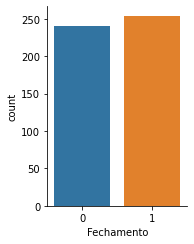

In [36]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Em 2021 houve 131 fechamentos com aumento nos valores de ações da Petrobras e 116 com fechamento em queda.

## 4.5 Concatenar noticias diárias

In [37]:
df_petro.head()

Date  Adj Close    Volume  Var%  Fechamento
0 2020-01-02      20.47  37774500  0.02           1
1 2020-01-03      20.30  71595600 -0.01           0
2 2020-01-06      20.54  81844000  0.01           1
3 2020-01-07      20.46  32822000 -0.00           0
4 2020-01-08      20.33  48215600 -0.01           0

In [38]:
df.head()

title  \
10  indústria tem maior nível de emprego em 4 anos...   
11  clarissa lins, do ibp, renuncia como integrant...   
12  petrobras viverá momento de transformação nos ...   
20  governo não descarta intervir na petrobras par...   
21  postos aguardam petrobras para reajustar preço...   

                          media       date  \
10                           G1 2020-02-01   
11               Época Negócios 2020-02-01   
12              Valor Econômico 2020-02-01   
20  Blog do Correio Braziliense 2020-03-01   
21                   Metrópoles 2020-03-01   

                                                 desc  
10  Indústria tem maior nível de emprego em 4 anos...  
11  A Petrobras informa que a conselheira de admin...  
12  Os anos 2020 prometem ser de profundas transfo...  
20  Assessores próximos do presidente Jair Bolsona...  
21  Postos aguardam Petrobras para reajustar preço...

In [39]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [40]:
pd.set_option('display.max_rows', 50)

In [41]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

Date                                           Noticias
27  2020-01-02   petrobras e vale retiram seus funcionários de...
53  2020-01-03   petrobras reduz preços do diesel e da gasolin...
81  2020-01-04   petrobras faz redução em produção de petróleo...
128 2020-01-06   petrobras avança processo de venda de campos ...
148 2020-01-07   o adeus da petrobras ao amazonas petrobras vê...
..         ...                                                ...
600 2021-12-27   alerj vai à justiça contra a petrobras para b...
601 2021-12-28   distribuidoras de gás de 5 estados entram na ...
602 2021-12-29   petrobras vai recorrer de decisão que suspend...
603 2021-12-30   judicialização coloca mercado de gás em risco...
604 2021-12-31   cvm | petrobras (petr4) informa potencial de ...

[605 rows x 2 columns]

## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [42]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

Date                                           Noticias
0   2020-01-06    petrobras faz redução em produção de petróle...
1   2020-01-13    quase fechada a venda de refinaria da petrob...
2   2020-01-20    após bb, petrobras também anuncia que aposen...
3   2020-01-27    demissões em empresa da petrobras em araucár...
4   2020-02-03    indústria tem maior nível de emprego em 4 an...
..         ...                                                ...
106 2021-11-29    bolsonaro critica política de preços dos com...
107 2021-12-06    petrobras aumenta exportação de óleo pelo po...
108 2021-12-13    petrobras fecha venda da six por 33 milhões ...
109 2021-12-20    petrobras abre o 1º concurso em 3 anos com s...
110 2021-12-27    petrobras vende carmópolis por us$ 1,1 bilhã...

[111 rows x 2 columns]

## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [43]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [44]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(605, 617)

## 4.8 Mesclando o dataframe noticias finais e ações

In [45]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
4 2020-01-08      20.33  48215600 -0.01           0   
5 2020-01-09      20.27  36102700 -0.00           0   
6 2020-01-10      20.18  25397500 -0.00           0   
7 2020-01-13      20.22  30676800  0.00           1   
8 2020-01-14      20.00  39796500 -0.01           0   
9 2020-01-15      19.70  34405700 -0.02           0   

                                            Noticias  
0   petrobras e vale retiram seus funcionários de...  
1   petrobras reduz preços do diesel e da gasolin...  
2    petrobras faz redução em produção de petróle...  
3   o adeus da petrobras ao amazonas petrobras vê...  
4                                                NaN  
5   refinarias da petrobras apresentam queda na c...  
6   petrobras pode criar subsidiárias para vender...  
7    quase fechada a venda de refinaria da petrob...  
8   fábrica de fertilizantes da petrobras no para...  
9   petrobras vende ativos na nigéria e encerra a...

In [46]:
df_news_diaria_atualizada.head(12)

Date                                           Noticias
0  2020-01-02   petrobras e vale retiram seus funcionários de...
1  2020-01-03   petrobras reduz preços do diesel e da gasolin...
2  2020-01-04   petrobras faz redução em produção de petróleo...
3  2020-01-06    petrobras faz redução em produção de petróle...
4  2020-01-07   o adeus da petrobras ao amazonas petrobras vê...
5  2020-01-09   refinarias da petrobras apresentam queda na c...
6  2020-01-10   petrobras pode criar subsidiárias para vender...
7  2020-01-11   quase fechada a venda de refinaria da petrobr...
8  2020-01-12   petrobras vende áreas de produção e abre espa...
9  2020-01-13    quase fechada a venda de refinaria da petrob...
10 2020-01-14   fábrica de fertilizantes da petrobras no para...
11 2020-01-15   petrobras vende ativos na nigéria e encerra a...

In [47]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2020-01-08
 25    2020-02-06
 28    2020-02-11
 31    2020-02-14
 43    2020-03-05
 44    2020-03-06
 62    2020-04-01
 66    2020-04-07
 77    2020-04-24
 85    2020-05-07
 129   2020-07-09
 152   2020-08-11
 155   2020-08-14
 168   2020-09-02
 172   2020-09-09
 210   2020-11-04
 212   2020-11-06
 228   2020-12-01
 231   2020-12-04
 235   2020-12-10
 252   2021-01-08
 256   2021-01-14
 257   2021-01-15
 261   2021-01-21
 264   2021-01-27
 270   2021-02-04
 288   2021-03-04
 289   2021-03-05
 291   2021-03-09
 299   2021-03-19
 311   2021-04-07
 316   2021-04-14
 320   2021-04-20
 331   2021-05-06
 335   2021-05-12
 365   2021-06-24
 370   2021-07-01
 382   2021-07-20
 384   2021-07-22
 388   2021-07-28
 390   2021-07-30
 394   2021-08-05
 395   2021-08-06
 400   2021-08-13
 418   2021-09-09
 419   2021-09-10
 456   2021-11-04
 468   2021-11-23
 Name: Date, dtype: datetime64[ns],
 48)

No total houveram 48 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [48]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(495, 48)

## 4.9 Exclusão dias com pregões sem noticias

In [49]:
df_final = df_final.dropna()

In [50]:
len(df_final)

447

# 5.0 NLP

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

# 5.1 SentilexPT: Inputação de polaridade de novos termos ao dicionário SentilexPT

In [156]:
#sentilexpt = open('SentiLex-lem-PT01.txt','r',encoding='utf-8-sig')
#sentilexpt = open('SentiLex-lem-PT01.txt','r')
#sentilexpt = open('SentiLex-lem-PT01 editado.txt','r',encoding='utf-8-sig')
sentilexpt = open('SentiLex-lem-PT01 editado v3.txt','r',encoding='utf-8-sig')

Criando um dicionário com polaridades

In [157]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [158]:
print (dic_palavra_polaridade.get('legal'))

1


In [159]:
print (dic_palavra_polaridade.get('milhão'))

3


In [160]:
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [161]:
def sentimento(score):
    if score > 0:
        return 'Positivo'                      # se maior que 0 retorna 'positivo'
    elif score == 0:
        return 'Neutro'                     # se igual a 0 retorna 'neutro'
    else:
        return 'Negativo'                     # se menor que 0 retorna 'negativo'
        
    return score

In [162]:
testescore = Score_sentimento("DescaRadO e FeIO")
testescore

-2

In [163]:
sentimento(testescore)

'Negativo'

In [164]:
df_final2 = df_final.copy()

In [165]:
df_final2['score'] = df_final2['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2['Sentimento'] = df_final2['score'].apply(lambda x: sentimento(x))
df_final2

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
5   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
490 2021-12-23      23.24  28713600  0.01           1   
491 2021-12-27      23.58  44227900  0.01           1   
492 2021-12-28      23.61  30688100  0.00           1   
493 2021-12-29      23.41  35508400 -0.01           0   
494 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  score Sentimento  
0     petrobras e vale retiram seus funcionários de...      0     Neutro  
1     petrobras reduz preços do diesel e da gasolin...      0     Neutro  
2      petrobras faz redução em produção de petróle...      3   Positivo  
3     o adeus da petrobras ao amazonas petrobras vê...     -6   Negativo  
5     refinarias da petrobras apresentam queda na c...     -3   Negativo  
..                                                 ...    ...        ...  
490   programa da petrobras que reforça capital de ...     -1   Negativo  
491    petrobras vende carmópolis por us$ 1,1 bilhã...      6   Positivo  
492   distribuidoras de gás de 5 estados entram na ...     -7   Negativo  
493   petrobras vai recorrer de decisão que suspend...     -6   Negativo  
494   judicialização coloca mercado de gás em risco...     -2   Negativo  

[447 rows x 8 columns]

In [166]:
df_final2.corr().sort_values(by = "Fechamento", ascending = True)

Adj Close  Volume  Var%  Fechamento  score
Volume          -0.29    1.00 -0.10        0.00   0.01
Adj Close        1.00   -0.29  0.06        0.08   0.12
score            0.12    0.01  0.23        0.45   1.00
Var%             0.06   -0.10  1.00        0.61   0.23
Fechamento       0.08    0.00  0.61        1.00   0.45

## Criando novo DF com etapas de stopwords e lemmatization:

In [167]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to C:\Users\HP ZBook
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\HP ZBook
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [168]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [169]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [170]:
def Preprocessing_pt(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))


In [171]:
def Preprocessing_en(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [172]:
df_final2_tratado = df_final2.copy()

In [173]:
df_final2_tratado['Noticias'] = df_final2_tratado['Noticias'].apply(lambda x: Preprocessing_pt(x))

In [174]:
df_final2_tratado['score'] = df_final2_tratado['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2_tratado['Sentimento'] = df_final2_tratado['score'].apply(lambda x: sentimento(x))
df_final2_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  score Sentimento  
0  petrobr val ret funcion china, cingap jap mei ...      0     Neutro  
1            petrobr reduz preç diesel gasolin refin      0     Neutro  
2  petrobr faz reduç produç petróle gast pessoal ...      0     Neutro  
3  adeu petrobr ama petrobr vê ades 20% funcion p...      0     Neutro  
5  refin petrobr apresent qued carg glob process ...      0     Neutro

# 5.2 Tradução e aplicação textblob e vader sentiment

### Instanciando função de tradução

In [175]:
from googletrans import Translator

In [176]:
trans = Translator()

In [177]:
trans.translate("The book is on the table", dest = 'pt').text

'O livro está sobre a mesa'

In [178]:
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [179]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

### Instanciando calculo de polaridade e subjetividade

In [180]:
from textblob import TextBlob

In [181]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [182]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

In [183]:
polaridade("tudo ótimo e perfeito"), subjetividade("tudo ótimo e perfeito")

(0.0, 0.0)

### Instanciando calculo de sentimento

In [184]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [185]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [186]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [187]:
type(sentiment)
sentiment.get('neu')

0.556

In [188]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento

In [189]:
negatividade("tudo ótimo e perfeito"), neutralidade("tudo ótimo e perfeito"), positividade("tudo ótimo e perfeito"), composicao("tudo ótimo e perfeito")

(0.0, 1.0, 0.0, 0.0)

In [190]:
df_final3 = df_final.copy()

### Realiza tradução - Cuidado pode demorar muito. 
Caso já tenha sido traduzido previamente deve ser realizado a leitura do arquivo 'df_noticias_traduzidas.csv' na linha de baixo

In [367]:
#Tradução alternativa
df_final3.reset_index(inplace=True)
df_final3.drop(['index'], axis = 1, inplace = True) 

import time
for i in range(0, len(df_final3['Noticias'])):
    if len(df_final3['Noticias'][i])>0:
        df_final3['Noticias'][i] = trans.translate(df_final3['Noticias'][i]).text
        time.sleep(2)

In [191]:
#Opção para tradução sem sleep(2)
df_final3['Noticias'] = df_final3['Noticias'].apply(lambda x: traduzir(x))

In [192]:
#df_final3.to_csv('df_noticias_traduzidas.csv',sep = '|',header=True,encoding='utf-8-sig', index=False)

In [193]:
# ler arquivo previamente traduzido
#df_final3 = pd.read_csv('df_noticias_traduzidas.csv', sep='|')

In [194]:
#Limpando linhas com noticias nulas após a tradução
#df_final3 = df_final3[df_final3['Noticias']!='']

In [195]:
df_final3.head(19)

Date  Adj Close    Volume  Var%  Fechamento  \
0  2020-01-02      20.47  37774500  0.02           1   
1  2020-01-03      20.30  71595600 -0.01           0   
2  2020-01-06      20.54  81844000  0.01           1   
3  2020-01-07      20.46  32822000 -0.00           0   
5  2020-01-09      20.27  36102700 -0.00           0   
6  2020-01-10      20.18  25397500 -0.00           0   
7  2020-01-13      20.22  30676800  0.00           1   
8  2020-01-14      20.00  39796500 -0.01           0   
9  2020-01-15      19.70  34405700 -0.02           0   
10 2020-01-16      19.68  28997400 -0.00           0   
11 2020-01-17      19.90  34908000  0.01           1   
12 2020-01-20      20.00  31241400  0.01           1   
13 2020-01-21      19.75  28577400 -0.01           0   
14 2020-01-22      19.53  32491500 -0.01           0   
15 2020-01-23      19.77  53752100  0.01           1   
16 2020-01-24      19.53  36898700 -0.01           0   
17 2020-01-27      18.69  66105300 -0.04           0   
18 2020-01-28      19.20  47259100  0.03           1   
19 2020-01-29      19.23  42297500  0.00           1   

                                             Noticias  
0   petrobras and vale withdraw their employees fr...  
1   petrobras reduces diesel and gasoline prices a...  
2   petrobras makes reduction in oil production an...  
3   petrobras goodbye to amazons petrobras sees mo...  
5   Petrobras refineries show a drop in global oil...  
6   petrobras may create subsidiaries to sell 8 re...  
7   the sale of petrobras refinery in bahia almost...  
8   petrobras fertilizer plant in paraná closes do...  
9   petrobras sells assets in nigeria and closes a...  
10  company renationalized by petrobras in dilma g...  
11  petrobras and premeditated instability, by fra...  
12  after bb, petrobras also announces that retire...  
13  petrobras: carf renders unfavorable decision o...  
14  conjur - petrobras is sentenced to r$ 9 billio...  
15  petrobras updates communication of more than 5...  
16  stj president suspends fine and withdraws petr...  
17  layoffs at a petrobras company in araucaria st...  
18                petrobras hires marcia tosta | News  
19  petrobras employees approve strike starting on...

In [196]:
df_final3['polaridade'] = df_final3['Noticias'].apply(lambda x: polaridade(str(x)))
df_final3['subjetividade'] = df_final3['Noticias'].apply(lambda x: subjetividade(str(x)))
df_final3['negatividade'] = df_final3['Noticias'].apply(lambda x: negatividade(str(x)))
df_final3['neutralidade'] = df_final3['Noticias'].apply(lambda x: neutralidade(str(x)))
df_final3['positividade'] = df_final3['Noticias'].apply(lambda x: positividade(str(x)))
df_final3['composicao'] = df_final3['Noticias'].apply(lambda x: composicao(str(x)))
df_final3

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
5   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
490 2021-12-23      23.24  28713600  0.01           1   
491 2021-12-27      23.58  44227900  0.01           1   
492 2021-12-28      23.61  30688100  0.00           1   
493 2021-12-29      23.41  35508400 -0.01           0   
494 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  polaridade  \
0    petrobras and vale withdraw their employees fr...        0.00   
1    petrobras reduces diesel and gasoline prices a...        0.00   
2    petrobras makes reduction in oil production an...        0.00   
3    petrobras goodbye to amazons petrobras sees mo...        0.50   
5    Petrobras refineries show a drop in global oil...        0.00   
..                                                 ...         ...   
490  petrobras program that reinforces working capi...        0.37   
491  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
492  gas distributors in 5 states go to court again...        0.47   
493  petrobras will appeal the decision that suspen...        0.12   
494  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  
0             0.00          0.09          0.92          0.00       -0.38  
1             0.00          0.00          1.00          0.00        0.00  
2             0.00          0.04          0.93          0.04        0.00  
3             0.50          0.03          0.97          0.00       -0.03  
5             0.12          0.15          0.85          0.00       -0.27  
..             ...           ...           ...           ...         ...  
490           0.43          0.00          0.92          0.08        0.60  
491           0.40          0.05          0.88          0.07        0.54  
492           0.57          0.03          0.91          0.07        0.59  
493           0.33          0.03          0.83          0.13        0.88  
494           0.53          0.05          0.91          0.04       -0.05  

[447 rows x 12 columns]

## Criando novo DF com etapas de stopwords e lemmatization:

In [197]:
df_final3_tratado = df_final.copy()
df_final3_tratado['Noticias'] = df_final3['Noticias']

In [198]:
df_final3_tratado['Noticias'] = df_final3_tratado['Noticias'].apply(lambda x: Preprocessing_en(str(x)))
df_final3_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  
0  petrobr val withdraw employe china, singapor j...  
1         petrobr reduc diesel gasolin pric refineri  
2  petrobr mak reduction oil production personnel...  
3  petrobr goodby amazom petrobr see 20% employe ...  
5  petrobr refineri show drop glob oil processing...

In [199]:
df_final3_tratado['polaridade'] = df_final3_tratado['Noticias'].apply(lambda x: polaridade(str(x)))
df_final3_tratado['subjetividade'] = df_final3_tratado['Noticias'].apply(lambda x: subjetividade(str(x)))
df_final3_tratado['negatividade'] = df_final3_tratado['Noticias'].apply(lambda x: negatividade(str(x)))
df_final3_tratado['neutralidade'] = df_final3_tratado['Noticias'].apply(lambda x: neutralidade(str(x)))
df_final3_tratado['positividade'] = df_final3_tratado['Noticias'].apply(lambda x: positividade(str(x)))
df_final3_tratado['composicao'] = df_final3_tratado['Noticias'].apply(lambda x: composicao(str(x)))
df_final3_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  polaridade  \
0  petrobr val withdraw employe china, singapor j...        0.00   
1         petrobr reduc diesel gasolin pric refineri        0.00   
2  petrobr mak reduction oil production personnel...        0.00   
3  petrobr goodby amazom petrobr see 20% employe ...        0.00   
5  petrobr refineri show drop glob oil processing...        0.00   

   subjetividade  negatividade  neutralidade  positividade  composicao  
0           0.00          0.10          0.90          0.00       -0.38  
1           0.00          0.00          1.00          0.00        0.00  
2           0.00          0.08          0.87          0.05       -0.25  
3           0.00          0.00          1.00          0.00        0.00  
5           0.25          0.19          0.81          0.00       -0.27

# 5.3 Tradução e aplicação do modelo pré-treinado de Roberta
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [200]:
#pip install –upgrade pip

In [201]:
#pip install tensorflow

In [202]:
#pip install transformers

In [203]:
#pip install torch

In [204]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [205]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [206]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [207]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta
    

In [208]:
df_final4 = df_final.copy()

In [209]:
#df_final4['Noticias'] = df_final4['Noticias'].apply(lambda x: traduzir(x))

In [210]:
df_final4['Noticias'] = df_final3['Noticias']
df_final4.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  
0  petrobras and vale withdraw their employees fr...  
1  petrobras reduces diesel and gasoline prices a...  
2  petrobras makes reduction in oil production an...  
3  petrobras goodbye to amazons petrobras sees mo...  
5  Petrobras refineries show a drop in global oil...

In [211]:
df_final4['neg_rob'] = df_final4['Noticias'].apply(lambda x: neg_rob(str(x)))
df_final4['neu_rob'] = df_final4['Noticias'].apply(lambda x: neu_rob(str(x)))
df_final4['pos_rob'] = df_final4['Noticias'].apply(lambda x: pos_rob(str(x)))
df_final4

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
5   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
490 2021-12-23      23.24  28713600  0.01           1   
491 2021-12-27      23.58  44227900  0.01           1   
492 2021-12-28      23.61  30688100  0.00           1   
493 2021-12-29      23.41  35508400 -0.01           0   
494 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  neg_rob  neu_rob  \
0    petrobras and vale withdraw their employees fr...     0.72     0.27   
1    petrobras reduces diesel and gasoline prices a...     0.13     0.78   
2    petrobras makes reduction in oil production an...     0.08     0.85   
3    petrobras goodbye to amazons petrobras sees mo...     0.03     0.80   
5    Petrobras refineries show a drop in global oil...     0.29     0.68   
..                                                 ...      ...      ...   
490  petrobras program that reinforces working capi...     0.01     0.66   
491  petrobras sells carmópolis for us$ 1.1 billion...     0.38     0.56   
492  gas distributors in 5 states go to court again...     0.14     0.83   
493  petrobras will appeal the decision that suspen...     0.06     0.84   
494  judicialization puts gas market at risk, says ...     0.27     0.67   

     pos_rob  
0       0.01  
1       0.09  
2       0.07  
3       0.17  
5       0.03  
..       ...  
490     0.33  
491     0.06  
492     0.03  
493     0.10  
494     0.06  

[447 rows x 9 columns]

## Criando novo DF com etapas de stopwords e lemmatization

In [431]:
df_final4_tratado = df_final.copy()
df_final4_tratado['Noticias'] = df_final4['Noticias']

In [432]:
df_final4_tratado['Noticias'] = df_final4_tratado['Noticias'].apply(lambda x: Preprocessing_en(str(x)))
df_final4_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  
0  petrobr val withdraw employe china, singapor j...  
1         petrobr reduc diesel gasolin pric refineri  
2  petrobr mak reduction oil production personnel...  
3  petrobr goodby amazom petrobr see 20% employe ...  
5  petrobr refineri show drop glob oil processing...

In [433]:
df_final4_tratado['neg_rob'] = df_final4_tratado['Noticias'].apply(lambda x: neg_rob(str(x)))
df_final4_tratado['neu_rob'] = df_final4_tratado['Noticias'].apply(lambda x: neu_rob(str(x)))
df_final4_tratado['pos_rob'] = df_final4_tratado['Noticias'].apply(lambda x: pos_rob(str(x)))
df_final4_tratado

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
5   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
490 2021-12-23      23.24  28713600  0.01           1   
491 2021-12-27      23.58  44227900  0.01           1   
492 2021-12-28      23.61  30688100  0.00           1   
493 2021-12-29      23.41  35508400 -0.01           0   
494 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  neg_rob  neu_rob  \
0    petrobr val withdraw employe china, singapor j...     0.42     0.56   
1           petrobr reduc diesel gasolin pric refineri     0.16     0.78   
2    petrobr mak reduction oil production personnel...     0.10     0.87   
3    petrobr goodby amazom petrobr see 20% employe ...     0.02     0.74   
5    petrobr refineri show drop glob oil processing...     0.20     0.78   
..                                                 ...      ...      ...   
490  petrobr progr reinforc working capit suppli re...     0.04     0.89   
491  petrobr sell carmópolil us$ 1.1 billion petrob...     0.08     0.79   
492  ga distribu 5 stat go court petrobr rio readju...     0.05     0.90   
493  petrobr appe decision suspend ga increas rio j...     0.18     0.78   
494  judicialization put ga market risk, say petrob...     0.15     0.80   

     pos_rob  
0       0.02  
1       0.06  
2       0.03  
3       0.24  
5       0.03  
..       ...  
490     0.07  
491     0.13  
492     0.04  
493     0.04  
494     0.05  

[447 rows x 9 columns]

# 6.0 Machine Learning: Testes iniciais com seleção de conjunto features utilizando classificação com algorítmos ingênuos.

## 6.1 SentilexPT

In [212]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


In [213]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final2.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias','Sentimento'])
    y = df_final2['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
NearestCentroid                    0.68               0.69     0.69      0.68
BernoulliNB                        0.68               0.69     0.69      0.68
QuadraticDiscriminantAnalysis      0.68               0.68     0.68      0.68
GaussianNB                         0.68               0.68     0.68      0.68
RidgeClassifierCV                  0.68               0.68     0.68      0.68
RidgeClassifier                    0.68               0.68     0.68      0.68
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68
LinearSVC                          0.68               0.68     0.68      0.67
LogisticRegression                 0.68               0.68     0.68      0.67
CalibratedClassifierCV             0.68               0.68     0.68      0.67
SVC                                0.68               0.68     0.68      0.67
LabelPropagation                   0.67               0.67     0.67      0.66
LabelSpreading                     0.67               0.67     0.67      0.66
KNeighborsClassifier               0.66               0.66     0.66      0.66
SGDClassifier                      0.66               0.66     0.66      0.64
LGBMClassifier                     0.66               0.66     0.66      0.65
RandomForestClassifier             0.66               0.66     0.66      0.65
XGBClassifier                      0.66               0.66     0.66      0.65
AdaBoostClassifier                 0.66               0.66     0.66      0.65
ExtraTreeClassifier                0.66               0.66     0.66      0.65
ExtraTreesClassifier               0.66               0.66     0.66      0.65
DecisionTreeClassifier             0.66               0.66     0.66      0.65
BaggingClassifier                  0.66               0.66     0.66      0.65
Perceptron                         0.62               0.62     0.62      0.57
PassiveAggressiveClassifier        0.62               0.62     0.62      0.57
NuSVC                              0.56               0.56     0.56      0.56
DummyClassifier                    0.51               0.51     0.51      0.51

A acurácia dos top 5 algorítmos ficou em 69%

## 6.1.2 SentilexPT com noticias tratadas

In [214]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final2_tratado.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias','Sentimento'])
    y = df_final2_tratado['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
LinearDiscriminantAnalysis         0.56               0.55     0.55      0.49
LogisticRegression                 0.56               0.55     0.55      0.49
CalibratedClassifierCV             0.56               0.55     0.55      0.49
RidgeClassifierCV                  0.56               0.55     0.55      0.49
RidgeClassifier                    0.56               0.55     0.55      0.49
LinearSVC                          0.56               0.55     0.55      0.49
Perceptron                         0.55               0.55     0.55      0.47
NearestCentroid                    0.55               0.55     0.55      0.47
KNeighborsClassifier               0.54               0.55     0.55      0.47
BernoulliNB                        0.55               0.54     0.54      0.47
BaggingClassifier                  0.55               0.54     0.54      0.47
ExtraTreesClassifier               0.54               0.54     0.54      0.47
RandomForestClassifier             0.54               0.54     0.54      0.47
DecisionTreeClassifier             0.54               0.54     0.54      0.47
ExtraTreeClassifier                0.54               0.54     0.54      0.46
AdaBoostClassifier                 0.54               0.54     0.54      0.46
SGDClassifier                      0.54               0.54     0.54      0.44
SVC                                0.54               0.54     0.54      0.46
QuadraticDiscriminantAnalysis      0.53               0.54     0.54      0.46
GaussianNB                         0.53               0.54     0.54      0.46
LabelPropagation                   0.54               0.54     0.54      0.46
LabelSpreading                     0.54               0.54     0.54      0.46
NuSVC                              0.53               0.54     0.54      0.46
LGBMClassifier                     0.53               0.53     0.53      0.46
XGBClassifier                      0.53               0.53     0.53      0.46
PassiveAggressiveClassifier        0.53               0.53     0.53      0.43
DummyClassifier                    0.51               0.51     0.51      0.51

Sem os dados tratados (stopwods e lemmatization) o algorítmo performou melhor

## 6.2 Tradução + Vader Sentiment

In [475]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final3.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final3['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
BernoulliNB                        0.55               0.55     0.55      0.55
LabelPropagation                   0.54               0.54     0.54      0.54
LabelSpreading                     0.54               0.54     0.54      0.54
QuadraticDiscriminantAnalysis      0.53               0.54     0.54      0.45
XGBClassifier                      0.54               0.54     0.54      0.53
LGBMClassifier                     0.53               0.53     0.53      0.53
NearestCentroid                    0.53               0.53     0.53      0.53
ExtraTreesClassifier               0.52               0.52     0.52      0.52
DecisionTreeClassifier             0.52               0.52     0.52      0.52
GaussianNB                         0.52               0.52     0.52      0.51
RidgeClassifier                    0.52               0.52     0.52      0.52
LinearDiscriminantAnalysis         0.52               0.52     0.52      0.52
LinearSVC                          0.52               0.52     0.52      0.52
RidgeClassifierCV                  0.52               0.52     0.52      0.52
LogisticRegression                 0.52               0.52     0.52      0.52
NuSVC                              0.52               0.52     0.52      0.52
SVC                                0.52               0.52     0.52      0.51
BaggingClassifier                  0.51               0.51     0.51      0.51
RandomForestClassifier             0.51               0.51     0.51      0.51
ExtraTreeClassifier                0.51               0.51     0.51      0.51
SGDClassifier                      0.51               0.51     0.51      0.48
DummyClassifier                    0.51               0.51     0.51      0.51
Perceptron                         0.51               0.51     0.51      0.48
KNeighborsClassifier               0.50               0.50     0.50      0.50
AdaBoostClassifier                 0.51               0.50     0.50      0.50
CalibratedClassifierCV             0.51               0.50     0.50      0.48
PassiveAggressiveClassifier        0.50               0.50     0.50      0.47

A acurácia dos top 5 algorítmos variou de 55 á 54%

## 6.2.1 Tradução + Vader Sentiment com dados tratados

In [476]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final3_tratado.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final3_tratado['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
BernoulliNB                        0.52               0.52     0.52      0.52
LinearSVC                          0.52               0.51     0.51      0.51
RidgeClassifier                    0.52               0.51     0.51      0.51
RidgeClassifierCV                  0.52               0.51     0.51      0.51
NearestCentroid                    0.51               0.51     0.51      0.51
GaussianNB                         0.51               0.51     0.51      0.51
LinearDiscriminantAnalysis         0.52               0.51     0.51      0.50
LogisticRegression                 0.51               0.51     0.51      0.50
CalibratedClassifierCV             0.51               0.51     0.51      0.48
DummyClassifier                    0.51               0.51     0.51      0.51
QuadraticDiscriminantAnalysis      0.50               0.51     0.51      0.37
SGDClassifier                      0.50               0.50     0.50      0.47
ExtraTreeClassifier                0.50               0.50     0.50      0.50
Perceptron                         0.50               0.50     0.50      0.48
PassiveAggressiveClassifier        0.50               0.50     0.50      0.48
AdaBoostClassifier                 0.50               0.50     0.50      0.49
DecisionTreeClassifier             0.50               0.50     0.50      0.49
SVC                                0.50               0.50     0.50      0.48
XGBClassifier                      0.48               0.48     0.48      0.48
KNeighborsClassifier               0.48               0.48     0.48      0.48
RandomForestClassifier             0.48               0.48     0.48      0.48
BaggingClassifier                  0.48               0.48     0.48      0.48
ExtraTreesClassifier               0.48               0.48     0.48      0.48
LGBMClassifier                     0.47               0.47     0.47      0.47
LabelSpreading                     0.46               0.46     0.46      0.46
NuSVC                              0.46               0.46     0.46      0.45
LabelPropagation                   0.45               0.45     0.45      0.45

Sem os dados tratados (stopwods e lemmatization) o algorítmo performou melhor

## 6.3 Modelo pré-treinado de Roberta

In [477]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final4.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final4['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.45it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
NearestCentroid                    0.54               0.54     0.54      0.54
BernoulliNB                        0.53               0.53     0.53      0.53
LinearSVC                          0.53               0.53     0.53      0.52
RidgeClassifier                    0.53               0.53     0.53      0.52
LinearDiscriminantAnalysis         0.53               0.53     0.53      0.52
RidgeClassifierCV                  0.53               0.53     0.53      0.52
LogisticRegression                 0.53               0.53     0.53      0.52
SVC                                0.53               0.52     0.52      0.52
GaussianNB                         0.52               0.52     0.52      0.51
QuadraticDiscriminantAnalysis      0.52               0.52     0.52      0.51
NuSVC                              0.51               0.51     0.51      0.51
CalibratedClassifierCV             0.51               0.51     0.51      0.48
PassiveAggressiveClassifier        0.51               0.51     0.51      0.48
Perceptron                         0.51               0.51     0.51      0.48
DummyClassifier                    0.51               0.51     0.51      0.51
KNeighborsClassifier               0.50               0.50     0.50      0.50
LabelSpreading                     0.50               0.50     0.50      0.50
LabelPropagation                   0.50               0.50     0.50      0.50
ExtraTreeClassifier                0.50               0.50     0.50      0.50
SGDClassifier                      0.49               0.50     0.50      0.46
LGBMClassifier                     0.49               0.49     0.49      0.48
AdaBoostClassifier                 0.49               0.49     0.49      0.48
RandomForestClassifier             0.48               0.48     0.48      0.48
BaggingClassifier                  0.47               0.47     0.47      0.47
ExtraTreesClassifier               0.47               0.47     0.47      0.47
DecisionTreeClassifier             0.47               0.47     0.47      0.47
XGBClassifier                      0.46               0.46     0.46      0.46

A acurácia dos top 5 algorítmos variou de 54 a 52%

# 6.3.2 Modelo pré-treinado de Roberta com dados tratados

In [478]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final4_tratado.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final4_tratado['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.31it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
LGBMClassifier                     0.52               0.52     0.52      0.52
GaussianNB                         0.52               0.52     0.52      0.50
NearestCentroid                    0.52               0.52     0.52      0.51
LogisticRegression                 0.52               0.52     0.52      0.50
RidgeClassifierCV                  0.52               0.52     0.52      0.50
LinearSVC                          0.52               0.52     0.52      0.50
LinearDiscriminantAnalysis         0.52               0.52     0.52      0.50
RidgeClassifier                    0.52               0.52     0.52      0.50
BernoulliNB                        0.52               0.52     0.52      0.51
XGBClassifier                      0.51               0.51     0.51      0.51
BaggingClassifier                  0.51               0.51     0.51      0.51
ExtraTreeClassifier                0.51               0.51     0.51      0.51
KNeighborsClassifier               0.51               0.51     0.51      0.51
DummyClassifier                    0.51               0.51     0.51      0.51
SVC                                0.51               0.51     0.51      0.50
QuadraticDiscriminantAnalysis      0.50               0.50     0.50      0.49
ExtraTreesClassifier               0.50               0.50     0.50      0.50
AdaBoostClassifier                 0.50               0.50     0.50      0.50
RandomForestClassifier             0.50               0.50     0.50      0.50
CalibratedClassifierCV             0.51               0.50     0.50      0.46
PassiveAggressiveClassifier        0.50               0.50     0.50      0.42
LabelPropagation                   0.50               0.49     0.49      0.49
DecisionTreeClassifier             0.49               0.49     0.49      0.49
SGDClassifier                      0.49               0.49     0.49      0.45
LabelSpreading                     0.49               0.49     0.49      0.49
Perceptron                         0.49               0.49     0.49      0.44
NuSVC                              0.48               0.48     0.48      0.48

## Nenhum modelo com pré-processamento das noticias performou melhor, nao utilizaremos os dados tratados

A acurácia dos top 5 modelos ficou em 52%

## 6.4 Composição SentilextPT + Tradução & Vader Sentiment

In [215]:
df_final5 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final5

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
4   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
442 2021-12-23      23.24  28713600  0.01           1   
443 2021-12-27      23.58  44227900  0.01           1   
444 2021-12-28      23.61  30688100  0.00           1   
445 2021-12-29      23.41  35508400 -0.01           0   
446 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  polaridade  \
0    petrobras and vale withdraw their employees fr...        0.00   
1    petrobras reduces diesel and gasoline prices a...        0.00   
2    petrobras makes reduction in oil production an...        0.00   
3    petrobras goodbye to amazons petrobras sees mo...        0.50   
4    Petrobras refineries show a drop in global oil...        0.00   
..                                                 ...         ...   
442  petrobras program that reinforces working capi...        0.37   
443  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
444  gas distributors in 5 states go to court again...        0.47   
445  petrobras will appeal the decision that suspen...        0.12   
446  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  \
0             0.00          0.09          0.92          0.00       -0.38   
1             0.00          0.00          1.00          0.00        0.00   
2             0.00          0.04          0.93          0.04        0.00   
3             0.50          0.03          0.97          0.00       -0.03   
4             0.12          0.15          0.85          0.00       -0.27   
..             ...           ...           ...           ...         ...   
442           0.43          0.00          0.92          0.08        0.60   
443           0.40          0.05          0.88          0.07        0.54   
444           0.57          0.03          0.91          0.07        0.59   
445           0.33          0.03          0.83          0.13        0.88   
446           0.53          0.05          0.91          0.04       -0.05   

                                            Noticias_y  score Sentimento  
0     petrobras e vale retiram seus funcionários de...      0     Neutro  
1     petrobras reduz preços do diesel e da gasolin...      0     Neutro  
2      petrobras faz redução em produção de petróle...      3   Positivo  
3     o adeus da petrobras ao amazonas petrobras vê...     -6   Negativo  
4     refinarias da petrobras apresentam queda na c...     -3   Negativo  
..                                                 ...    ...        ...  
442   programa da petrobras que reforça capital de ...     -1   Negativo  
443    petrobras vende carmópolis por us$ 1,1 bilhã...      6   Positivo  
444   distribuidoras de gás de 5 estados entram na ...     -7   Negativo  
445   petrobras vai recorrer de decisão que suspend...     -6   Negativo  
446   judicialização coloca mercado de gás em risco...     -2   Negativo  

[447 rows x 15 columns]

In [216]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
    y = df_final5['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
ExtraTreesClassifier               0.68               0.69     0.69      0.68
CalibratedClassifierCV             0.68               0.68     0.68      0.68
LogisticRegression                 0.68               0.68     0.68      0.68
LinearSVC                          0.68               0.68     0.68      0.68
RidgeClassifierCV                  0.68               0.68     0.68      0.68
RandomForestClassifier             0.68               0.68     0.68      0.68
RidgeClassifier                    0.68               0.68     0.68      0.68
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68
NearestCentroid                    0.68               0.68     0.68      0.68
LGBMClassifier                     0.68               0.68     0.68      0.68
XGBClassifier                      0.67               0.67     0.67      0.67
GaussianNB                         0.67               0.67     0.67      0.67
AdaBoostClassifier                 0.67               0.67     0.67      0.67
BernoulliNB                        0.66               0.66     0.66      0.66
SVC                                0.66               0.66     0.66      0.66
BaggingClassifier                  0.65               0.65     0.65      0.65
DecisionTreeClassifier             0.64               0.64     0.64      0.64
NuSVC                              0.64               0.64     0.64      0.64
SGDClassifier                      0.63               0.63     0.63      0.62
LabelSpreading                     0.63               0.63     0.63      0.63
ExtraTreeClassifier                0.63               0.63     0.63      0.63
LabelPropagation                   0.63               0.63     0.63      0.63
Perceptron                         0.63               0.63     0.63      0.62
KNeighborsClassifier               0.62               0.62     0.62      0.62
PassiveAggressiveClassifier        0.62               0.62     0.62      0.61
QuadraticDiscriminantAnalysis      0.56               0.57     0.57      0.49
DummyClassifier                    0.51               0.51     0.51      0.51

A acurácia dos top 5 algorítmos ficou entre 69 e 68%                     

## 6.5 Composição SentilextPT + Tradução & Roberta

In [217]:
df_final6 = df_final4.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final6

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
4   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
442 2021-12-23      23.24  28713600  0.01           1   
443 2021-12-27      23.58  44227900  0.01           1   
444 2021-12-28      23.61  30688100  0.00           1   
445 2021-12-29      23.41  35508400 -0.01           0   
446 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  neg_rob  neu_rob  \
0    petrobras and vale withdraw their employees fr...     0.72     0.27   
1    petrobras reduces diesel and gasoline prices a...     0.13     0.78   
2    petrobras makes reduction in oil production an...     0.08     0.85   
3    petrobras goodbye to amazons petrobras sees mo...     0.03     0.80   
4    Petrobras refineries show a drop in global oil...     0.29     0.68   
..                                                 ...      ...      ...   
442  petrobras program that reinforces working capi...     0.01     0.66   
443  petrobras sells carmópolis for us$ 1.1 billion...     0.38     0.56   
444  gas distributors in 5 states go to court again...     0.14     0.83   
445  petrobras will appeal the decision that suspen...     0.06     0.84   
446  judicialization puts gas market at risk, says ...     0.27     0.67   

     pos_rob                                         Noticias_y  score  \
0       0.01   petrobras e vale retiram seus funcionários de...      0   
1       0.09   petrobras reduz preços do diesel e da gasolin...      0   
2       0.07    petrobras faz redução em produção de petróle...      3   
3       0.17   o adeus da petrobras ao amazonas petrobras vê...     -6   
4       0.03   refinarias da petrobras apresentam queda na c...     -3   
..       ...                                                ...    ...   
442     0.33   programa da petrobras que reforça capital de ...     -1   
443     0.06    petrobras vende carmópolis por us$ 1,1 bilhã...      6   
444     0.03   distribuidoras de gás de 5 estados entram na ...     -7   
445     0.10   petrobras vai recorrer de decisão que suspend...     -6   
446     0.06   judicialização coloca mercado de gás em risco...     -2   

    Sentimento  
0       Neutro  
1       Neutro  
2     Positivo  
3     Negativo  
4     Negativo  
..         ...  
442   Negativo  
443   Positivo  
444   Negativo  
445   Negativo  
446   Negativo  

[447 rows x 12 columns]

In [218]:
X = df_final6.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final6['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [221]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final6.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
    y = df_final6['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
LinearSVC                          0.69               0.69     0.69      0.69
CalibratedClassifierCV             0.69               0.69     0.69      0.69
RidgeClassifierCV                  0.68               0.68     0.68      0.68
RidgeClassifier                    0.68               0.68     0.68      0.68
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68
LogisticRegression                 0.68               0.68     0.68      0.68
NearestCentroid                    0.68               0.68     0.68      0.68
BernoulliNB                        0.68               0.68     0.68      0.67
SVC                                0.66               0.66     0.66      0.66
GaussianNB                         0.66               0.66     0.66      0.65
LabelSpreading                     0.65               0.65     0.65      0.65
LabelPropagation                   0.65               0.65     0.65      0.65
QuadraticDiscriminantAnalysis      0.65               0.65     0.65      0.65
ExtraTreesClassifier               0.65               0.65     0.65      0.65
RandomForestClassifier             0.65               0.65     0.65      0.65
NuSVC                              0.64               0.64     0.64      0.64
BaggingClassifier                  0.64               0.64     0.64      0.64
AdaBoostClassifier                 0.64               0.64     0.64      0.64
LGBMClassifier                     0.63               0.63     0.63      0.63
DecisionTreeClassifier             0.63               0.63     0.63      0.63
XGBClassifier                      0.63               0.63     0.63      0.63
SGDClassifier                      0.62               0.62     0.62      0.61
KNeighborsClassifier               0.62               0.62     0.62      0.62
PassiveAggressiveClassifier        0.62               0.62     0.62      0.60
ExtraTreeClassifier                0.61               0.61     0.61      0.61
Perceptron                         0.61               0.61     0.61      0.60
DummyClassifier                    0.51               0.51     0.51      0.51

A acurácia dos top 5 algorítmos variou de 69 a 68%       

## 6.6 Composição Tradução & Vader Sentiment + Tradução & Roberta


In [222]:
df_final7 = df_final4.merge(df_final3, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final7

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
4   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
442 2021-12-23      23.24  28713600  0.01           1   
443 2021-12-27      23.58  44227900  0.01           1   
444 2021-12-28      23.61  30688100  0.00           1   
445 2021-12-29      23.41  35508400 -0.01           0   
446 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  neg_rob  neu_rob  \
0    petrobras and vale withdraw their employees fr...     0.72     0.27   
1    petrobras reduces diesel and gasoline prices a...     0.13     0.78   
2    petrobras makes reduction in oil production an...     0.08     0.85   
3    petrobras goodbye to amazons petrobras sees mo...     0.03     0.80   
4    Petrobras refineries show a drop in global oil...     0.29     0.68   
..                                                 ...      ...      ...   
442  petrobras program that reinforces working capi...     0.01     0.66   
443  petrobras sells carmópolis for us$ 1.1 billion...     0.38     0.56   
444  gas distributors in 5 states go to court again...     0.14     0.83   
445  petrobras will appeal the decision that suspen...     0.06     0.84   
446  judicialization puts gas market at risk, says ...     0.27     0.67   

     pos_rob                                         Noticias_y  polaridade  \
0       0.01  petrobras and vale withdraw their employees fr...        0.00   
1       0.09  petrobras reduces diesel and gasoline prices a...        0.00   
2       0.07  petrobras makes reduction in oil production an...        0.00   
3       0.17  petrobras goodbye to amazons petrobras sees mo...        0.50   
4       0.03  Petrobras refineries show a drop in global oil...        0.00   
..       ...                                                ...         ...   
442     0.33  petrobras program that reinforces working capi...        0.37   
443     0.06  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
444     0.03  gas distributors in 5 states go to court again...        0.47   
445     0.10  petrobras will appeal the decision that suspen...        0.12   
446     0.06  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  
0             0.00          0.09          0.92          0.00       -0.38  
1             0.00          0.00          1.00          0.00        0.00  
2             0.00          0.04          0.93          0.04        0.00  
3             0.50          0.03          0.97          0.00       -0.03  
4             0.12          0.15          0.85          0.00       -0.27  
..             ...           ...           ...           ...         ...  
442           0.43          0.00          0.92          0.08        0.60  
443           0.40          0.05          0.88          0.07        0.54  
444           0.57          0.03          0.91          0.07        0.59  
445           0.33          0.03          0.83          0.13        0.88  
446           0.53          0.05          0.91          0.04       -0.05  

[447 rows x 16 columns]

In [223]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final7.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y'])
    y = df_final7['Fechamento']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.82it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
BernoulliNB                        0.56               0.56     0.56      0.56
NearestCentroid                    0.54               0.54     0.54      0.53
QuadraticDiscriminantAnalysis      0.52               0.53     0.53      0.45
GaussianNB                         0.52               0.52     0.52      0.51
LGBMClassifier                     0.52               0.52     0.52      0.52
XGBClassifier                      0.51               0.51     0.51      0.51
LinearDiscriminantAnalysis         0.51               0.51     0.51      0.50
RidgeClassifier                    0.51               0.51     0.51      0.50
LinearSVC                          0.51               0.51     0.51      0.50
BaggingClassifier                  0.51               0.51     0.51      0.50
LogisticRegression                 0.51               0.51     0.51      0.50
DummyClassifier                    0.51               0.51     0.51      0.51
RidgeClassifierCV                  0.51               0.51     0.51      0.50
RandomForestClassifier             0.50               0.50     0.50      0.50
Perceptron                         0.50               0.50     0.50      0.49
ExtraTreeClassifier                0.50               0.50     0.50      0.50
ExtraTreesClassifier               0.50               0.50     0.50      0.50
PassiveAggressiveClassifier        0.50               0.50     0.50      0.49
CalibratedClassifierCV             0.51               0.50     0.50      0.48
SGDClassifier                      0.50               0.50     0.50      0.48
SVC                                0.50               0.50     0.50      0.49
NuSVC                              0.50               0.50     0.50      0.50
AdaBoostClassifier                 0.50               0.50     0.50      0.50
DecisionTreeClassifier             0.49               0.49     0.49      0.49
LabelSpreading                     0.48               0.48     0.48      0.48
LabelPropagation                   0.48               0.48     0.48      0.48
KNeighborsClassifier               0.47               0.47     0.47      0.47

A acurácia dos top 5 algorítmos variou de 56% á 52%        

## 6.7 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta


In [224]:
# Sentilex + Vader
df_final8 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])

In [225]:
# + Roberta
df_final8 = df_final8.merge(df_final4, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final8.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
4 2020-01-09      20.27  36102700 -0.00           0   

                                          Noticias_x  polaridade  \
0  petrobras and vale withdraw their employees fr...        0.00   
1  petrobras reduces diesel and gasoline prices a...        0.00   
2  petrobras makes reduction in oil production an...        0.00   
3  petrobras goodbye to amazons petrobras sees mo...        0.50   
4  Petrobras refineries show a drop in global oil...        0.00   

   subjetividade  negatividade  neutralidade  positividade  composicao  \
0           0.00          0.09          0.92          0.00       -0.38   
1           0.00          0.00          1.00          0.00        0.00   
2           0.00          0.04          0.93          0.04        0.00   
3           0.50          0.03          0.97          0.00       -0.03   
4           0.12          0.15          0.85          0.00       -0.27   

                                          Noticias_y  score Sentimento  \
0   petrobras e vale retiram seus funcionários de...      0     Neutro   
1   petrobras reduz preços do diesel e da gasolin...      0     Neutro   
2    petrobras faz redução em produção de petróle...      3   Positivo   
3   o adeus da petrobras ao amazonas petrobras vê...     -6   Negativo   
4   refinarias da petrobras apresentam queda na c...     -3   Negativo   

                                            Noticias  neg_rob  neu_rob  \
0  petrobras and vale withdraw their employees fr...     0.72     0.27   
1  petrobras reduces diesel and gasoline prices a...     0.13     0.78   
2  petrobras makes reduction in oil production an...     0.08     0.85   
3  petrobras goodbye to amazons petrobras sees mo...     0.03     0.80   
4  Petrobras refineries show a drop in global oil...     0.29     0.68   

   pos_rob  
0     0.01  
1     0.09  
2     0.07  
3     0.17  
4     0.03

In [226]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
    y = df_final8['Fechamento']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
CalibratedClassifierCV             0.68               0.68     0.68      0.68
LogisticRegression                 0.68               0.68     0.68      0.68
LinearSVC                          0.68               0.68     0.68      0.68
RidgeClassifierCV                  0.68               0.68     0.68      0.68
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68
RidgeClassifier                    0.68               0.68     0.68      0.68
RandomForestClassifier             0.67               0.67     0.67      0.67
XGBClassifier                      0.67               0.67     0.67      0.67
LGBMClassifier                     0.66               0.66     0.66      0.66
NearestCentroid                    0.66               0.66     0.66      0.66
ExtraTreesClassifier               0.66               0.66     0.66      0.66
BaggingClassifier                  0.65               0.65     0.65      0.65
AdaBoostClassifier                 0.65               0.65     0.65      0.65
GaussianNB                         0.65               0.65     0.65      0.64
SVC                                0.64               0.64     0.64      0.64
DecisionTreeClassifier             0.62               0.62     0.62      0.62
Perceptron                         0.62               0.62     0.62      0.61
SGDClassifier                      0.61               0.62     0.62      0.61
BernoulliNB                        0.61               0.61     0.61      0.61
LabelSpreading                     0.60               0.60     0.60      0.60
LabelPropagation                   0.60               0.60     0.60      0.60
ExtraTreeClassifier                0.60               0.60     0.60      0.60
KNeighborsClassifier               0.59               0.59     0.59      0.59
NuSVC                              0.59               0.59     0.59      0.59
PassiveAggressiveClassifier        0.57               0.57     0.57      0.56
QuadraticDiscriminantAnalysis      0.56               0.56     0.56      0.49
DummyClassifier                    0.51               0.51     0.51      0.51

A acurácia dos top 5 algorítmos ficou em 68%

- SVC
- ExtraTreesClassifier
- RidgeClassifierCV
- NearestCentroid
- LinearSVC
              

# 6.8 Teste: Todas as features do dia atual - PCA e Normalização

In [227]:
df_models = pd.DataFrame()

## repetir o experimento 30x
for rep in range(0,30,1):
    
    print("Repeticão = %s!" % rep)
   
    #Lista de features consideradas e definição de X e Y:
    X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
    y = df_final8['Fechamento']  
    
    #Holdout em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
    
    
    #Testando sem PCA e sem Normalizacao
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = reg.fit(X_train, X_test, y_train, y_test) 
    #models['conjunto_features'] = k
    models['n_PCA'] = "N/A"
    models['Normalizado'] = False
    df_models = df_models.append(models.reset_index(), ignore_index=True)
    
    
    ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
    for i in range(2,len(X.columns),1):
    
        #Aplicando PCA
        pca = PCA(n_components=i)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.fit_transform(x_test)

        #Aplicando Normalização
        scaler_train = StandardScaler()
        scaler_test = StandardScaler()

        scaler_train.fit(x_train_pca)
        scaler_test.fit(x_test_pca)

        x_train_pca_normalized = scaler_train.transform(x_train_pca)
        x_test_pca_normalized = scaler_test.transform(x_test_pca)


        #Testando PCA + normalizado 
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
        #models['conjunto_features'] = k
        models['n_PCA'] = i
        models['Normalizado'] = True
        # Armazenando os modelos
        df_models = df_models.append(models.reset_index(), ignore_index=True)

        #Testando PCA
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
        #models['conjunto_features'] = k
        models['n_PCA'] = i 
        models['Normalizado'] = False
        # Armazenando os modelos
        df_models = df_models.append(models.reset_index(), ignore_index=True)    


Repeticão = 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Repeticão = 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Repeticão = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Repeticão = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Repeticão = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Repeticão = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Repeticão = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Repeticão = 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Repeticão = 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Repeticão = 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Repeticão = 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Repeticão = 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Repeticão = 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Repeticão = 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Repeticão = 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Repeticão = 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Repeticão = 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Repeticão = 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Repeticão = 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Repeticão = 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Repeticão = 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.31it/s]


Repeticão = 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Repeticão = 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Repeticão = 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.53it/s]


Repeticão = 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Repeticão = 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.98it/s]


Repeticão = 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Repeticão = 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Repeticão = 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.37it/s]


Repeticão = 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


In [228]:
df_models.groupby(['Model','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

Accuracy  Balanced Accuracy  ROC AUC  \
Model           n_PCA Normalizado                                         
NearestCentroid 5     False            0.58               0.58     0.58   
                2     False            0.58               0.58     0.58   
                      True             0.58               0.58     0.58   
LinearSVC       2     False            0.58               0.58     0.58   
NearestCentroid 5     True             0.58               0.58     0.58   
...                                     ...                ...      ...   
DummyClassifier 7     False            0.48               0.49     0.49   
                6     True             0.48               0.49     0.49   
                      False            0.48               0.49     0.49   
                5     True             0.48               0.49     0.49   
                8     False            0.48               0.49     0.49   

                                   F1 Score  
Model           n_PCA Normalizado            
NearestCentroid 5     False            0.58  
                2     False            0.58  
                      True             0.58  
LinearSVC       2     False            0.57  
NearestCentroid 5     True             0.58  
...                                     ...  
DummyClassifier 7     False            0.48  
                6     True             0.48  
                      False            0.48  
                5     True             0.48  
                8     False            0.48  

[459 rows x 4 columns]

A acurácia dos top 5 algorítmos fiocu em 58% aplicando PCA e Normalização em algums casos


Conclusões: Aplicando PCA e normalização á todas as features do dia atual não aumenta a performance

# 7.0 Feature Engineering - Seleção do conjunto de features de dias anteriores

De acordo com as análises preliminares selecionaremos o conjunto de features composto pelos métodos de NLP 
- Composição SentilextPT + Tradução & Vader Sentiment + Roberta

adicionaremos as features de n dias anteriores para avaliar a performance da classificação

In [229]:
df_final99 = df_final8.copy()
df_final99

Date  Adj Close    Volume  Var%  Fechamento  \
0   2020-01-02      20.47  37774500  0.02           1   
1   2020-01-03      20.30  71595600 -0.01           0   
2   2020-01-06      20.54  81844000  0.01           1   
3   2020-01-07      20.46  32822000 -0.00           0   
4   2020-01-09      20.27  36102700 -0.00           0   
..         ...        ...       ...   ...         ...   
442 2021-12-23      23.24  28713600  0.01           1   
443 2021-12-27      23.58  44227900  0.01           1   
444 2021-12-28      23.61  30688100  0.00           1   
445 2021-12-29      23.41  35508400 -0.01           0   
446 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  polaridade  \
0    petrobras and vale withdraw their employees fr...        0.00   
1    petrobras reduces diesel and gasoline prices a...        0.00   
2    petrobras makes reduction in oil production an...        0.00   
3    petrobras goodbye to amazons petrobras sees mo...        0.50   
4    Petrobras refineries show a drop in global oil...        0.00   
..                                                 ...         ...   
442  petrobras program that reinforces working capi...        0.37   
443  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
444  gas distributors in 5 states go to court again...        0.47   
445  petrobras will appeal the decision that suspen...        0.12   
446  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  \
0             0.00          0.09          0.92          0.00       -0.38   
1             0.00          0.00          1.00          0.00        0.00   
2             0.00          0.04          0.93          0.04        0.00   
3             0.50          0.03          0.97          0.00       -0.03   
4             0.12          0.15          0.85          0.00       -0.27   
..             ...           ...           ...           ...         ...   
442           0.43          0.00          0.92          0.08        0.60   
443           0.40          0.05          0.88          0.07        0.54   
444           0.57          0.03          0.91          0.07        0.59   
445           0.33          0.03          0.83          0.13        0.88   
446           0.53          0.05          0.91          0.04       -0.05   

                                            Noticias_y  score Sentimento  \
0     petrobras e vale retiram seus funcionários de...      0     Neutro   
1     petrobras reduz preços do diesel e da gasolin...      0     Neutro   
2      petrobras faz redução em produção de petróle...      3   Positivo   
3     o adeus da petrobras ao amazonas petrobras vê...     -6   Negativo   
4     refinarias da petrobras apresentam queda na c...     -3   Negativo   
..                                                 ...    ...        ...   
442   programa da petrobras que reforça capital de ...     -1   Negativo   
443    petrobras vende carmópolis por us$ 1,1 bilhã...      6   Positivo   
444   distribuidoras de gás de 5 estados entram na ...     -7   Negativo   
445   petrobras vai recorrer de decisão que suspend...     -6   Negativo   
446   judicialização coloca mercado de gás em risco...     -2   Negativo   

                                              Noticias  neg_rob  neu_rob  \
0    petrobras and vale withdraw their employees fr...     0.72     0.27   
1    petrobras reduces diesel and gasoline prices a...     0.13     0.78   
2    petrobras makes reduction in oil production an...     0.08     0.85   
3    petrobras goodbye to amazons petrobras sees mo...     0.03     0.80   
4    Petrobras refineries show a drop in global oil...     0.29     0.68   
..                                                 ...      ...      ...   
442  petrobras program that reinforces working capi...     0.01     0.66   
443  petrobras sells carmópolis for us$ 1.1 billio

In [230]:
features = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade',  'positividade', 'composicao','score', 'neg_rob','neu_rob','pos_rob']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

In [231]:
#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final99[i+"d1"] = 0
    df_final99[i+"d2"] = 0
    df_final99[i+"d3"] = 0
    df_final99[i+"d4"] = 0
df_final99.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
4 2020-01-09      20.27  36102700 -0.00           0   

                                          Noticias_x  polaridade  \
0  petrobras and vale withdraw their employees fr...        0.00   
1  petrobras reduces diesel and gasoline prices a...        0.00   
2  petrobras makes reduction in oil production an...        0.00   
3  petrobras goodbye to amazons petrobras sees mo...        0.50   
4  Petrobras refineries show a drop in global oil...        0.00   

   subjetividade  negatividade  neutralidade  ...  neg_robd3  neg_robd4  \
0           0.00          0.09          0.92  ...          0          0   
1           0.00          0.00          1.00  ...          0          0   
2           0.00          0.04          0.93  ...          0          0   
3           0.50          0.03          0.97  ...          0          0   
4           0.12          0.15          0.85  ...          0          0   

  neu_robd1  neu_robd2 neu_robd3 neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
0         0          0         0         0          0          0          0   
1         0          0         0         0          0          0          0   
2         0          0         0         0          0          0          0   
3         0          0         0         0          0          0          0   
4         0          0         0         0          0          0          0   

   pos_robd4  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 59 columns]

In [232]:
df_final99[['Date','composicao','composicaod4']]

Date  composicao  composicaod4
0   2020-01-02       -0.38             0
1   2020-01-03        0.00             0
2   2020-01-06        0.00             0
3   2020-01-07       -0.03             0
4   2020-01-09       -0.27             0
..         ...         ...           ...
442 2021-12-23        0.60             0
443 2021-12-27        0.54             0
444 2021-12-28        0.59             0
445 2021-12-29        0.88             0
446 2021-12-30       -0.05             0

[447 rows x 3 columns]

In [233]:
import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final99[b] = df_final99.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final99[b] = df_final99.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final99[b] = df_final99.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final99[b] = df_final99.shift(periods=4)[a]


In [234]:
df_final99[['Date','composicao','composicaod4']]

Date  composicao  composicaod4
0   2020-01-02       -0.38           nan
1   2020-01-03        0.00           nan
2   2020-01-06        0.00           nan
3   2020-01-07       -0.03           nan
4   2020-01-09       -0.27         -0.38
..         ...         ...           ...
442 2021-12-23        0.60          0.76
443 2021-12-27        0.54          0.97
444 2021-12-28        0.59         -0.25
445 2021-12-29        0.88          0.82
446 2021-12-30       -0.05          0.60

[447 rows x 3 columns]

In [235]:
df_final99.isnull().sum()

Date          0
Adj Close     0
Volume        0
Var%          0
Fechamento    0
             ..
neu_robd4     4
pos_robd1     1
pos_robd2     2
pos_robd3     3
pos_robd4     4
Length: 59, dtype: int64

In [236]:
## Eliminação dos registros sem as features de dias anteriores (os primeiros 4 dias)
df_final99 = df_final99.dropna()
df_final99.isnull().sum()

Date          0
Adj Close     0
Volume        0
Var%          0
Fechamento    0
             ..
neu_robd4     0
pos_robd1     0
pos_robd2     0
pos_robd3     0
pos_robd4     0
Length: 59, dtype: int64

In [237]:
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x',
       'polaridade', 'subjetividade', 'negatividade', 'neutralidade',
       'positividade', 'composicao', 'Noticias_y', 'score', 'Sentimento',
       'Noticias', 'neg_rob', 'neu_rob', 'pos_rob', 'polaridaded1',
       'polaridaded2', 'polaridaded3', 'polaridaded4', 'subjetividaded1',
       'subjetividaded2', 'subjetividaded3', 'subjetividaded4',
       'negatividaded1', 'negatividaded2', 'negatividaded3', 'negatividaded4',
       'neutralidaded1', 'neutralidaded2', 'neutralidaded3', 'neutralidaded4',
       'positividaded1', 'positividaded2', 'positividaded3', 'positividaded4',
       'composicaod1', 'composicaod2', 'composicaod3', 'composicaod4',
       'scored1', 'scored2', 'scored3', 'scored4', 'neg_robd1', 'neg_robd2',
       'neg_robd3', 'neg_robd4', 'neu_robd1', 'neu_robd2', 'neu_robd3',
       'neu_robd4', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4'],
      dtype='object')

## Experimentos
iterando sobre d á d-n; 1<=n<=4  
c/ s/ PCA  
c/ s/ normalização  


In [ ]:
#Criando um dicionário com o conjunto de features do dia atual ao d-4:
feature_dias = {'dia atual': features, 'd-1': features+featuresd1, 'd-2':features+featuresd1+featuresd2, 'd-3':features+featuresd1+featuresd2+featuresd3, 'd-4':features+featuresd1+featuresd2+featuresd3+featuresd4}


In [ ]:
df_models = pd.DataFrame()

## repetir o experimento 30x 
for rep in range(0,30,1):
    
    #print("Repeticão = %s!" % rep)
    
    ## iterar sobre o conjunto de features entre a data e o dia -n (para 1<=n<=4)
    for k in feature_dias.keys():
    
        #Lista de features consideradas e definição de X e Y:
        lista_features = feature_dias[k]
        X = df_final99[lista_features]
        y = df_final99['Fechamento']  
    
        #Holdout em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
           
    
         #Testando sem PCA e sem Normalizacao
        #print("Testando para conjunto de features do dia atual à %s!" % k)
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train, x_test, y_train, y_test)
        models['conjunto_features'] = k
        models['n_PCA'] = "N/A"
        models['Normalizado'] = False
        models['repeticao'] = rep
        df_models = df_models.append(models.reset_index(), ignore_index=True)
        
        
    
        ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
        for i in range(2,len(X.columns),1):
    
            #Aplicando PCA
            pca = PCA(n_components=i)
            x_train_pca = pca.fit_transform(x_train)
            x_test_pca = pca.fit_transform(x_test)
    
            #Aplicando Normalização
            scaler_train = StandardScaler()
            scaler_test = StandardScaler()

            scaler_train.fit(x_train_pca)
            scaler_test.fit(x_test_pca)

            x_train_pca_normalized = scaler_train.transform(x_train_pca)
            x_test_pca_normalized = scaler_test.transform(x_test_pca)


            #Testando PCA + normalizado
            print("Testando para conjunto de features do dia atual à %s com PCA = %s e Normalização - Rep %s!" % (k,i,rep)) 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i
            models['Normalizado'] = True
            models['repeticao'] = rep
        
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)
    
            #Testando PCA
            #print("Testando para conjunto de features do dia atual à %s com PCA = %s! - Rep %s" % (k,i,rep))
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['Normalizado'] = False
            models['repeticao'] = rep
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)    

    

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.17it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.07it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.70it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.29it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.64it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.76it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.57it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.13it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.81it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.03it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.70it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.70it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.74it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.20it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.23it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.45it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.01it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.34it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.96it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.19it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.27it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.79it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.50it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.03it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.61it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.17it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.47it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.09it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.76it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.45it/s]


In [ ]:
df_models.groupby(['Model','conjunto_features','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

Accuracy  \
Model                conjunto_features n_PCA Normalizado             
NuSVC                d-1               N/A   False            0.58   
                     dia atual         N/A   False            0.58   
ExtraTreesClassifier dia atual         N/A   False            0.57   
BernoulliNB          dia atual         N/A   False            0.57   
SVC                  d-1               N/A   False            0.57   
...                                                            ...   
BaggingClassifier    d-2               5     True             0.46   
ExtraTreesClassifier d-2               4     True             0.46   
XGBClassifier        d-2               3     True             0.47   
LabelSpreading       d-2               4     True             0.46   
LabelPropagation     d-2               4     True             0.46   

                                                          Balanced Accuracy  \
Model                conjunto_features n_PCA Normalizado                      
NuSVC                d-1               N/A   False                     0.58   
                     dia atual         N/A   False                     0.58   
ExtraTreesClassifier dia atual         N/A   False                     0.58   
BernoulliNB          dia atual         N/A   False                     0.57   
SVC                  d-1               N/A   False                     0.57   
...                                                                     ...   
BaggingClassifier    d-2               5     True                      0.47   
ExtraTreesClassifier d-2               4     True                      0.47   
XGBClassifier        d-2               3     True                      0.47   
LabelSpreading       d-2               4     True                      0.46   
LabelPropagation     d-2               4     True                      0.46   

                                                          ROC AUC  F1 Score  
Model                conjunto_features n_PCA Normalizado                     
NuSVC                d-1               N/A   False           0.58      0.58  
                     dia atual         N/A   False           0.58      0.58  
ExtraTreesClassifier dia atual         N/A   False           0.58      0.57  
BernoulliNB          dia atual         N/A   False           0.57      0.57  
SVC                  d-1               N/A   False           0.57      0.56  
...                                                           ...       ...  
BaggingClassifier    d-2               5     True            0.47      0.46  
ExtraTreesClassifier d-2               4     True            0.47      0.46  
XGBClassifier        d-2               3     True            0.47      0.46  
LabelSpreading       d-2               4     True            0.46      0.46  
LabelPropagation     d-2               4     True            0.46      0.46  

[7695 rows x 4 columns]

In [ ]:
df_models.groupby(['Model','conjunto_features','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                      conjunto_features n_PCA Normalizado             
NuSVC                      d-1               N/A   False            0.58   
                           dia atual         N/A   False            0.58   
ExtraTreesClassifier       dia atual         N/A   False            0.57   
BernoulliNB                dia atual         N/A   False            0.57   
SVC                        d-1               N/A   False            0.57   
                           dia atual         N/A   False            0.56   
LGBMClassifier             dia atual         N/A   False            0.56   
LabelSpreading             dia atual         N/A   False            0.57   
XGBClassifier              dia atual         N/A   False            0.56   
LabelPropagation           dia atual         N/A   False            0.56   
RidgeClassifierCV          dia atual         2     False            0.56   
LogisticRegression         dia atual         2     False            0.56   
RidgeClassifier            dia atual         2     False            0.56   
LinearDiscriminantAnalysis dia atual         2     False            0.56   
LinearSVC                  dia atual         2     False            0.56   
RandomForestClassifier     d-2               N/A   False            0.56   
RidgeClassifierCV          dia atual         2     True             0.55   
RandomForestClassifier     dia atual         N/A   False            0.56   
CalibratedClassifierCV     dia atual         2     True             0.55   
                                                   False            0.55   
RidgeClassifier            dia atual         5     True             0.55   
LinearSVC                  dia atual         5     True             0.55   
LinearDiscriminantAnalysis dia atual         5     True             0.55   
LinearSVC                  dia atual         2     True             0.55   
LogisticRegression         dia atual         2     True             0.55   
LinearDiscriminantAnalysis dia atual         2     True             0.55   
                                             6     False            0.55   
RidgeClassifierCV          dia atual         9     True             0.55   
RidgeClassifier            dia atual         2     True             0.55   
NearestCentroid            dia atual         9     True             0.56   
RidgeClassifier            dia atual         6     False            0.55   
BaggingClassifier          dia atual         N/A   False            0.55   
LabelSpreading             d-1               N/A   False            0.56   
LinearSVC                  dia atual         6     False            0.55   
LabelPropagation           d-1               N/A   False            0.56   
LogisticRegression         dia atual         5     True             0.55   
GaussianNB                 dia atual         2     False            0.55   
RidgeClassifierCV          dia atual         6     False            0.55   
NearestCentroid            dia atual         8     True             0.56   
GaussianNB                 d-4               48    True             0.55   
LogisticRegression         dia atual         6     False            0.55   
LinearDiscriminantAnalysis dia atual         7     False            0.55   
RidgeClassifier            dia atual         7     False            0.55   
NearestCentroid            dia atual         N/A   False            0.56   
                                             5     True             0.55   
GaussianNB                 d-4               44    True             0.55   
LinearSVC                  dia atual         7     False            0.55   
RidgeClassifierCV          dia atual         5     True             0.55   
GaussianNB                 d-4               40    True             0.55   
                                             39    True             0.55   

                                                                Balanced Accuracy  \
Model                     

Realizando experimentações com todos os conjuntos de features dos dias anteriores observamos maior performance ao optar pelas features do dia atual sem aplicar PCA e sem normalização.

Vamos seguir uma segunda bateria de experimentos avaliando cada feature indivualmente e escolhendo as que mais tem correlação com a variavel alvo (Fechamento) e menos correlação entre si

# 8.0 Análise de Dados e seleção de features

In [238]:
df_analise = df_final99.copy()
df_analise.head()

Date  Adj Close    Volume  Var%  Fechamento  \
4 2020-01-09      20.27  36102700 -0.00           0   
5 2020-01-10      20.18  25397500 -0.00           0   
6 2020-01-13      20.22  30676800  0.00           1   
7 2020-01-14      20.00  39796500 -0.01           0   
8 2020-01-15      19.70  34405700 -0.02           0   

                                          Noticias_x  polaridade  \
4  Petrobras refineries show a drop in global oil...        0.00   
5  petrobras may create subsidiaries to sell 8 re...        0.00   
6  the sale of petrobras refinery in bahia almost...        0.05   
7  petrobras fertilizer plant in paraná closes do...       -0.15   
8  petrobras sells assets in nigeria and closes a...       -0.16   

   subjetividade  negatividade  neutralidade  ...  neg_robd3  neg_robd4  \
4           0.12          0.15          0.85  ...       0.13       0.72   
5           0.00          0.00          0.83  ...       0.08       0.13   
6           0.25          0.09          0.87  ...       0.03       0.08   
7           0.53          0.00          0.94  ...       0.29       0.03   
8           0.29          0.03          0.87  ...       0.06       0.29   

  neu_robd1  neu_robd2 neu_robd3 neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
4      0.80       0.85      0.78      0.27       0.17       0.07       0.09   
5      0.68       0.80      0.85      0.78       0.03       0.17       0.07   
6      0.88       0.68      0.80      0.85       0.05       0.03       0.17   
7      0.50       0.88      0.68      0.80       0.05       0.05       0.03   
8      0.63       0.50      0.88      0.68       0.04       0.05       0.05   

   pos_robd4  
4       0.01  
5       0.09  
6       0.07  
7       0.17  
8       0.03  

[5 rows x 59 columns]

### Correlação

Queremos selecionar as variáveis com alta correlação com a variável de resposta (Fechamento) e baixa correlação entre si

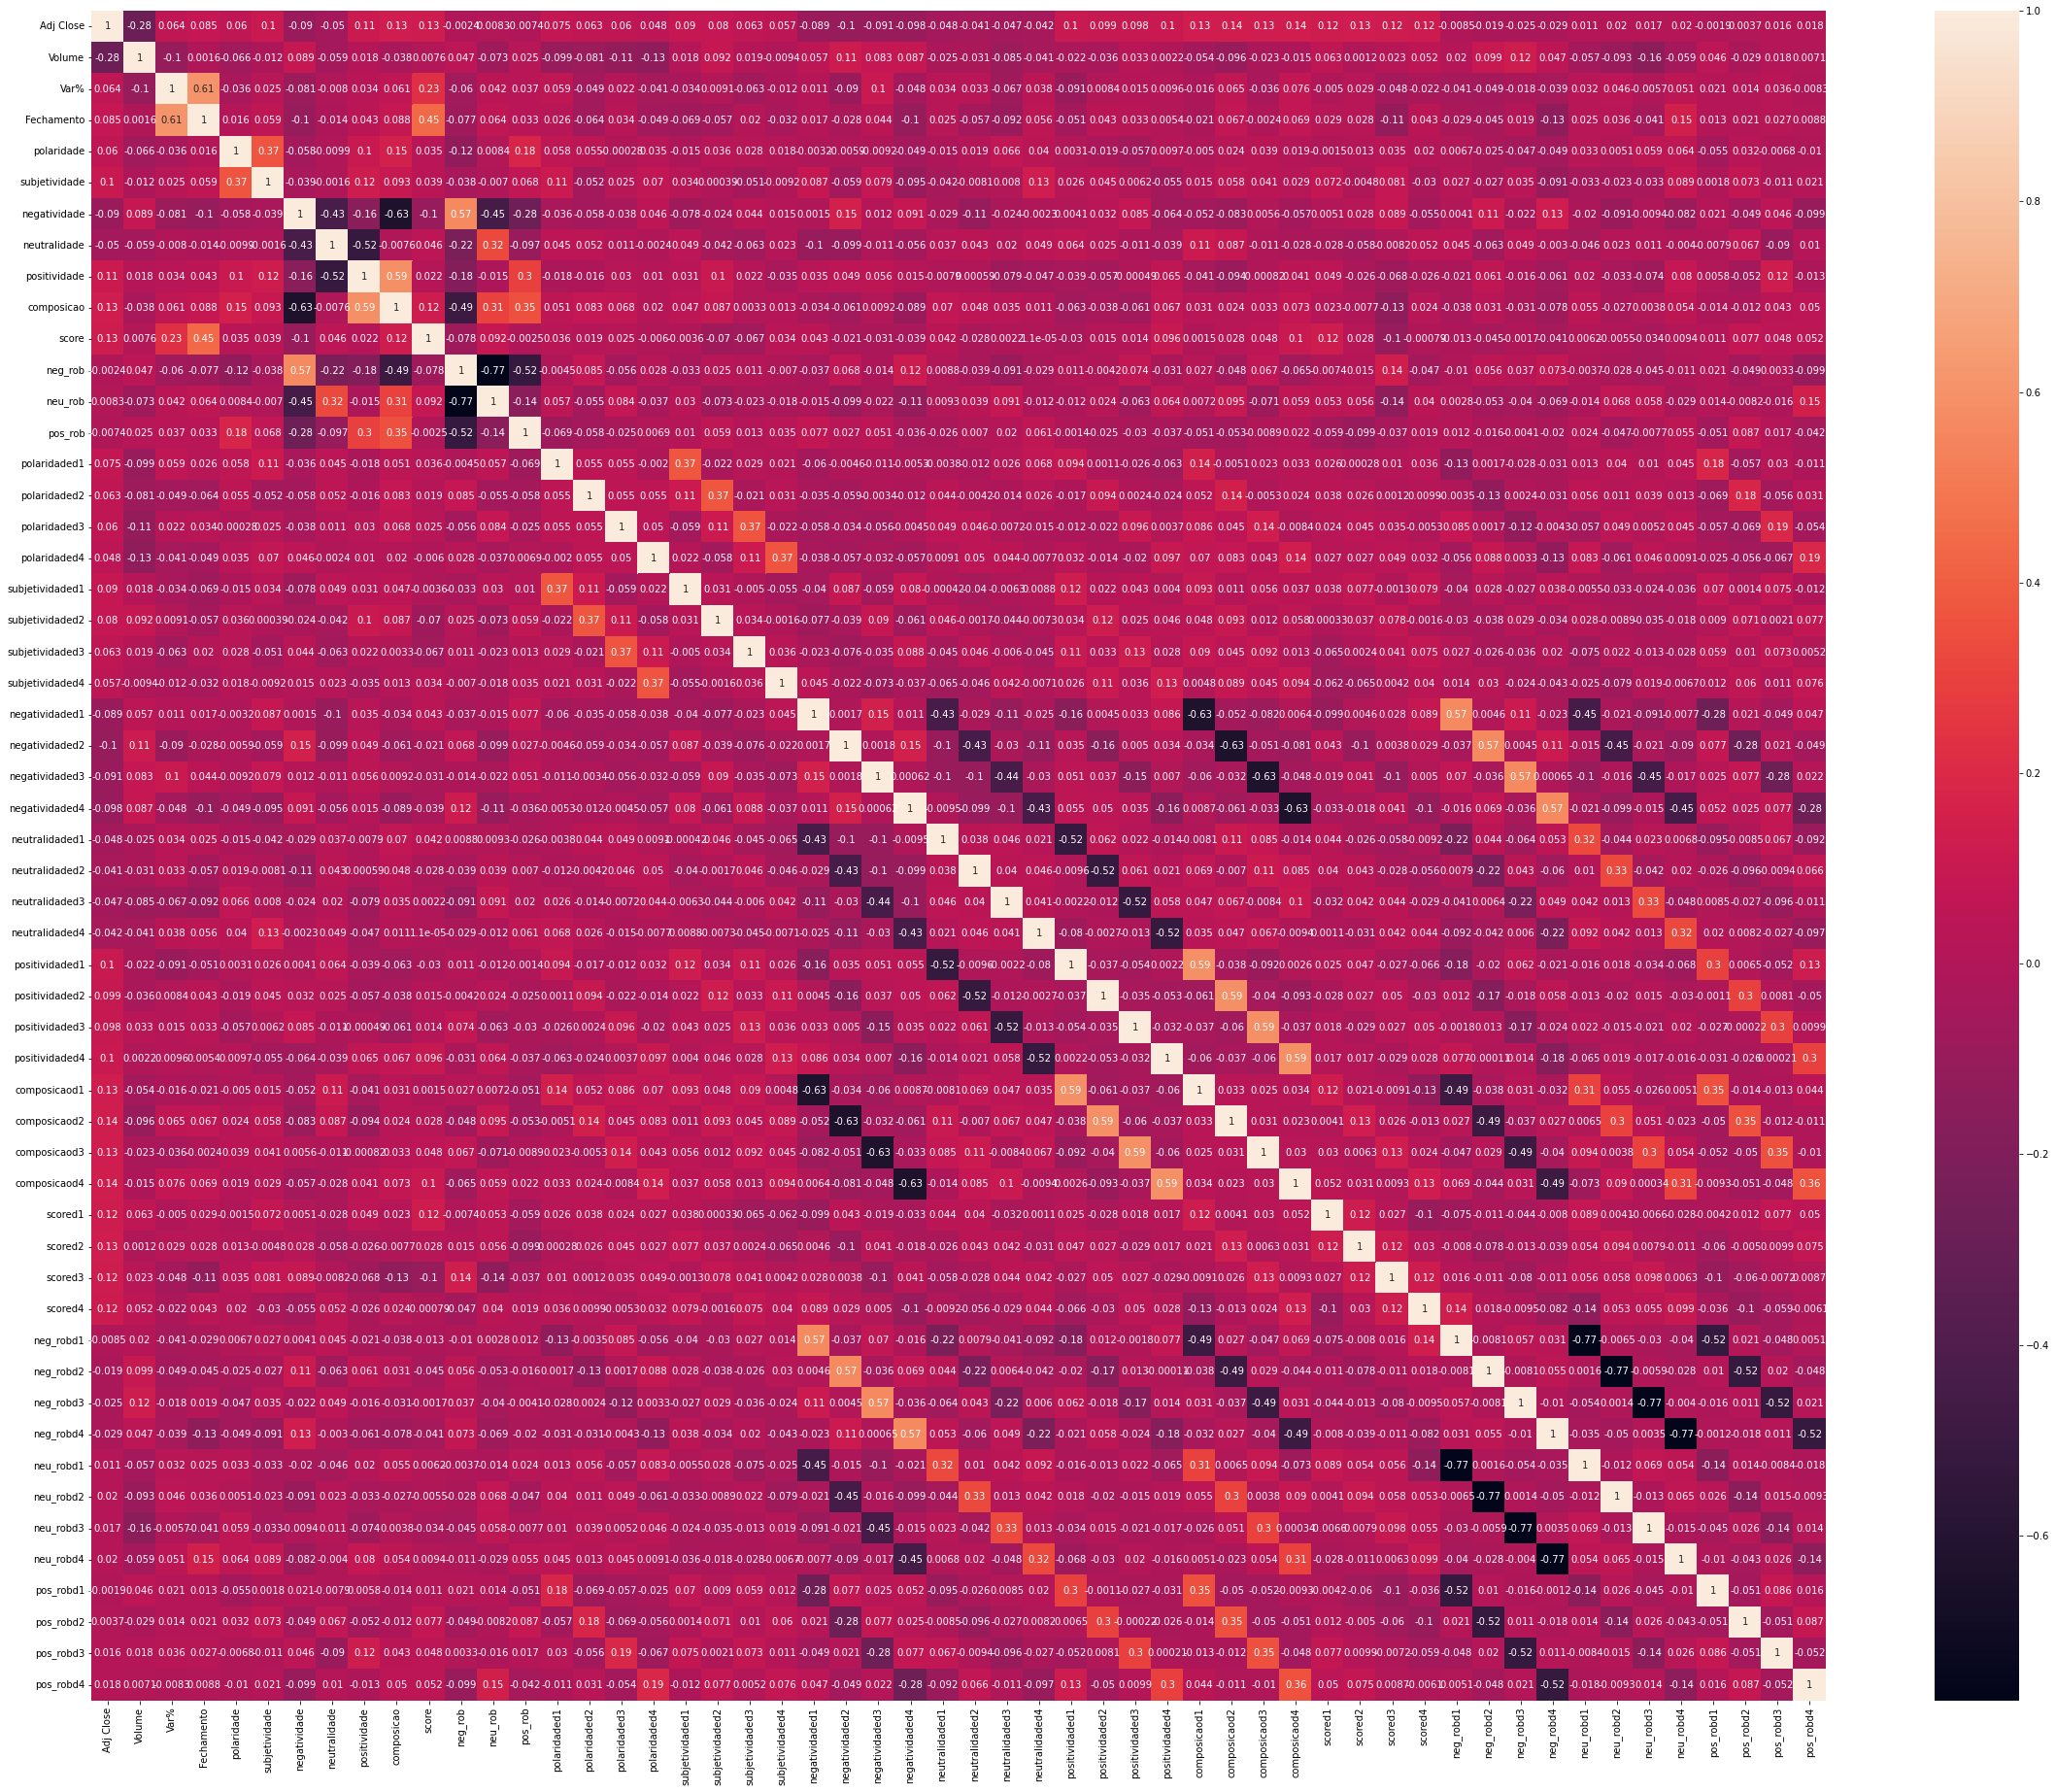

In [239]:
plt.figure(figsize=(40,32))
sns.heatmap(df_analise.corr(),annot=True)
plt.show()

In [240]:
df_analise.corr().sort_values(by = "Fechamento", ascending = True).head(10)

Adj Close  Volume  Var%  Fechamento  polaridade  \
neg_robd4            -0.03    0.05 -0.04       -0.13       -0.05   
scored3               0.12    0.02 -0.05       -0.11        0.04   
negatividade         -0.09    0.09 -0.08       -0.10       -0.06   
negatividaded4       -0.10    0.09 -0.05       -0.10       -0.05   
neutralidaded3       -0.05   -0.08 -0.07       -0.09        0.07   
neg_rob              -0.00    0.05 -0.06       -0.08       -0.12   
subjetividaded1       0.09    0.02 -0.03       -0.07       -0.01   
polaridaded2          0.06   -0.08 -0.05       -0.06        0.06   
neutralidaded2       -0.04   -0.03  0.03       -0.06        0.02   
subjetividaded2       0.08    0.09  0.01       -0.06        0.04   

                 subjetividade  negatividade  neutralidade  positividade  \
neg_robd4                -0.09          0.13         -0.00         -0.06   
scored3                   0.08          0.09         -0.01         -0.07   
negatividade             -0.04          1.00         -0.43         -0.16   
negatividaded4           -0.10          0.09         -0.06          0.01   
neutralidaded3            0.01         -0.02          0.02         -0.08   
neg_rob                  -0.04          0.57         -0.22         -0.18   
subjetividaded1           0.03         -0.08          0.05          0.03   
polaridaded2             -0.05         -0.06          0.05         -0.02   
neutralidaded2           -0.01         -0.11          0.04          0.00   
subjetividaded2           0.00         -0.02         -0.04          0.10   

                 composicao  ...  neg_robd3  neg_robd4  neu_robd1  neu_robd2  \
neg_robd4             -0.08  ...      -0.01       1.00      -0.04      -0.05   
scored3               -0.13  ...      -0.08      -0.01       0.06       0.06   
negatividade          -0.63  ...      -0.02       0.13      -0.02      -0.09   
negatividaded4        -0.09  ...      -0.04       0.57      -0.02      -0.10   
neutralidaded3         0.04  ...      -0.22       0.05       0.04       0.01   
neg_rob               -0.49  ...       0.04       0.07      -0.00      -0.03   
subjetividaded1        0.05  ...      -0.03       0.04      -0.01      -0.03   
polaridaded2           0.08  ...       0.00      -0.03       0.06       0.01   
neutralidaded2         0.05  ...       0.04      -0.06       0.01       0.33   
subjetividaded2        0.09  ...       0.03      -0.03       0.03      -0.01   

                 neu_robd3  neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
neg_robd4             0.00      -0.77      -0.00      -0.02       0.01   
scored3               0.10       0.01      -0.10      -0.06      -0.01   
negatividade         -0.01      -0.08       0.02      -0.05       0.05   
negatividaded4       -0.02      -0.45       0.05       0.02       0.08   
neutralidaded3        0.33      -0.05       0.01      -0.03      -0.10   
neg_rob              -0.05      -0.01       0.02      -0.05       0.00   
subjetividaded1      -0.02      -0.04       0.07       0.00       0.07   
polaridaded2          0.04       0.01      -0.07       0.18      -0.06   
neutralidaded2       -0.04       0.02      -0.03      -0.10      -0.01   
subjetividaded2      -0.04      -0.02       0.01       0.07       0.00   

                 pos_robd4  
neg_robd4            -0.52  
scored3               0.01  
negatividade         -0.10  
negatividaded4       -0.28  
neutralidaded3       -0.01  
neg_rob              -0.10  
subjetividaded1      -0.01  
polaridaded2          0.03  
neutralidaded2        0.07  
subjetividaded2       0.08  

[10 rows x 54 columns]

In [241]:
df_analise.corr().sort_values(by = "Fechamento", ascending = False).head(10)

Adj Close  Volume  Var%  Fechamento  polaridade  subjetividade  \
Fechamento          0.09    0.00  0.61        1.00        0.02           0.06   
Var%                0.06   -0.10  1.00        0.61       -0.04           0.03   
score               0.13    0.01  0.23        0.45        0.03           0.04   
neu_robd4           0.02   -0.06  0.05        0.15        0.06           0.09   
composicao          0.13   -0.04  0.06        0.09        0.15           0.09   
Adj Close           1.00   -0.28  0.06        0.09        0.06           0.10   
composicaod4        0.14   -0.02  0.08        0.07        0.02           0.03   
composicaod2        0.14   -0.10  0.06        0.07        0.02           0.06   
neu_rob             0.01   -0.07  0.04        0.06        0.01          -0.01   
subjetividade       0.10   -0.01  0.03        0.06        0.37           1.00   

               negatividade  neutralidade  positividade  composicao  ...  \
Fechamento            -0.10         -0.01          0.04        0.09  ...   
Var%                  -0.08         -0.01          0.03        0.06  ...   
score                 -0.10          0.05          0.02        0.12  ...   
neu_robd4             -0.08         -0.00          0.08        0.05  ...   
composicao            -0.63         -0.01          0.59        1.00  ...   
Adj Close             -0.09         -0.05          0.11        0.13  ...   
composicaod4          -0.06         -0.03          0.04        0.07  ...   
composicaod2          -0.08          0.09         -0.09        0.02  ...   
neu_rob               -0.45          0.32         -0.01        0.31  ...   
subjetividade         -0.04         -0.00          0.12        0.09  ...   

               neg_robd3  neg_robd4  neu_robd1  neu_robd2  neu_robd3  \
Fechamento          0.02      -0.13       0.02       0.04      -0.04   
Var%               -0.02      -0.04       0.03       0.05      -0.01   
score              -0.00      -0.04       0.01      -0.01      -0.03   
neu_robd4          -0.00      -0.77       0.05       0.06      -0.01   
composicao         -0.03      -0.08       0.05      -0.03       0.00   
Adj Close          -0.02      -0.03       0.01       0.02       0.02   
composicaod4        0.03      -0.49      -0.07       0.09       0.00   
composicaod2       -0.04       0.03       0.01       0.30       0.05   
neu_rob            -0.04      -0.07      -0.01       0.07       0.06   
subjetividade       0.04      -0.09      -0.03      -0.02      -0.03   

               neu_robd4  pos_robd1  pos_robd2  pos_robd3  pos_robd4  
Fechamento          0.15       0.01       0.02       0.03       0.01  
Var%                0.05       0.02       0.01       0.04      -0.01  
score               0.01       0.01       0.08       0.05       0.05  
neu_robd4           1.00      -0.01      -0.04       0.03      -0.14  
composicao          0.05      -0.01      -0.01       0.04       0.05  
Adj Close           0.02      -0.00       0.00       0.02       0.02  
composicaod4        0.31      -0.01      -0.05      -0.05       0.36  
composicaod2       -0.02      -0.05       0.35      -0.01      -0.01  
neu_rob            -0.03       0.01      -0.01      -0.02       0.15  
subjetividade       0.09       0.00       0.07      -0.01       0.02  

[10 rows x 54 columns]



As seguintes features são as que possui maior correlação com o Fechamento:

- score +0.45
- neu_robd4 +0.15
- neg_robd4 -0.13
- scored3 -0.11
- negatividade -0.10
- negatividaded4 -0.10
- neutralidaded3 -0.09
- composicao	+0.09



In [242]:
conjunto_features_corr = ['score','neu_robd4','neg_robd4','negatividade','negatividaded4','neutralidaded3','scored3','composicao']
variavel_alvo = ['Fechamento']

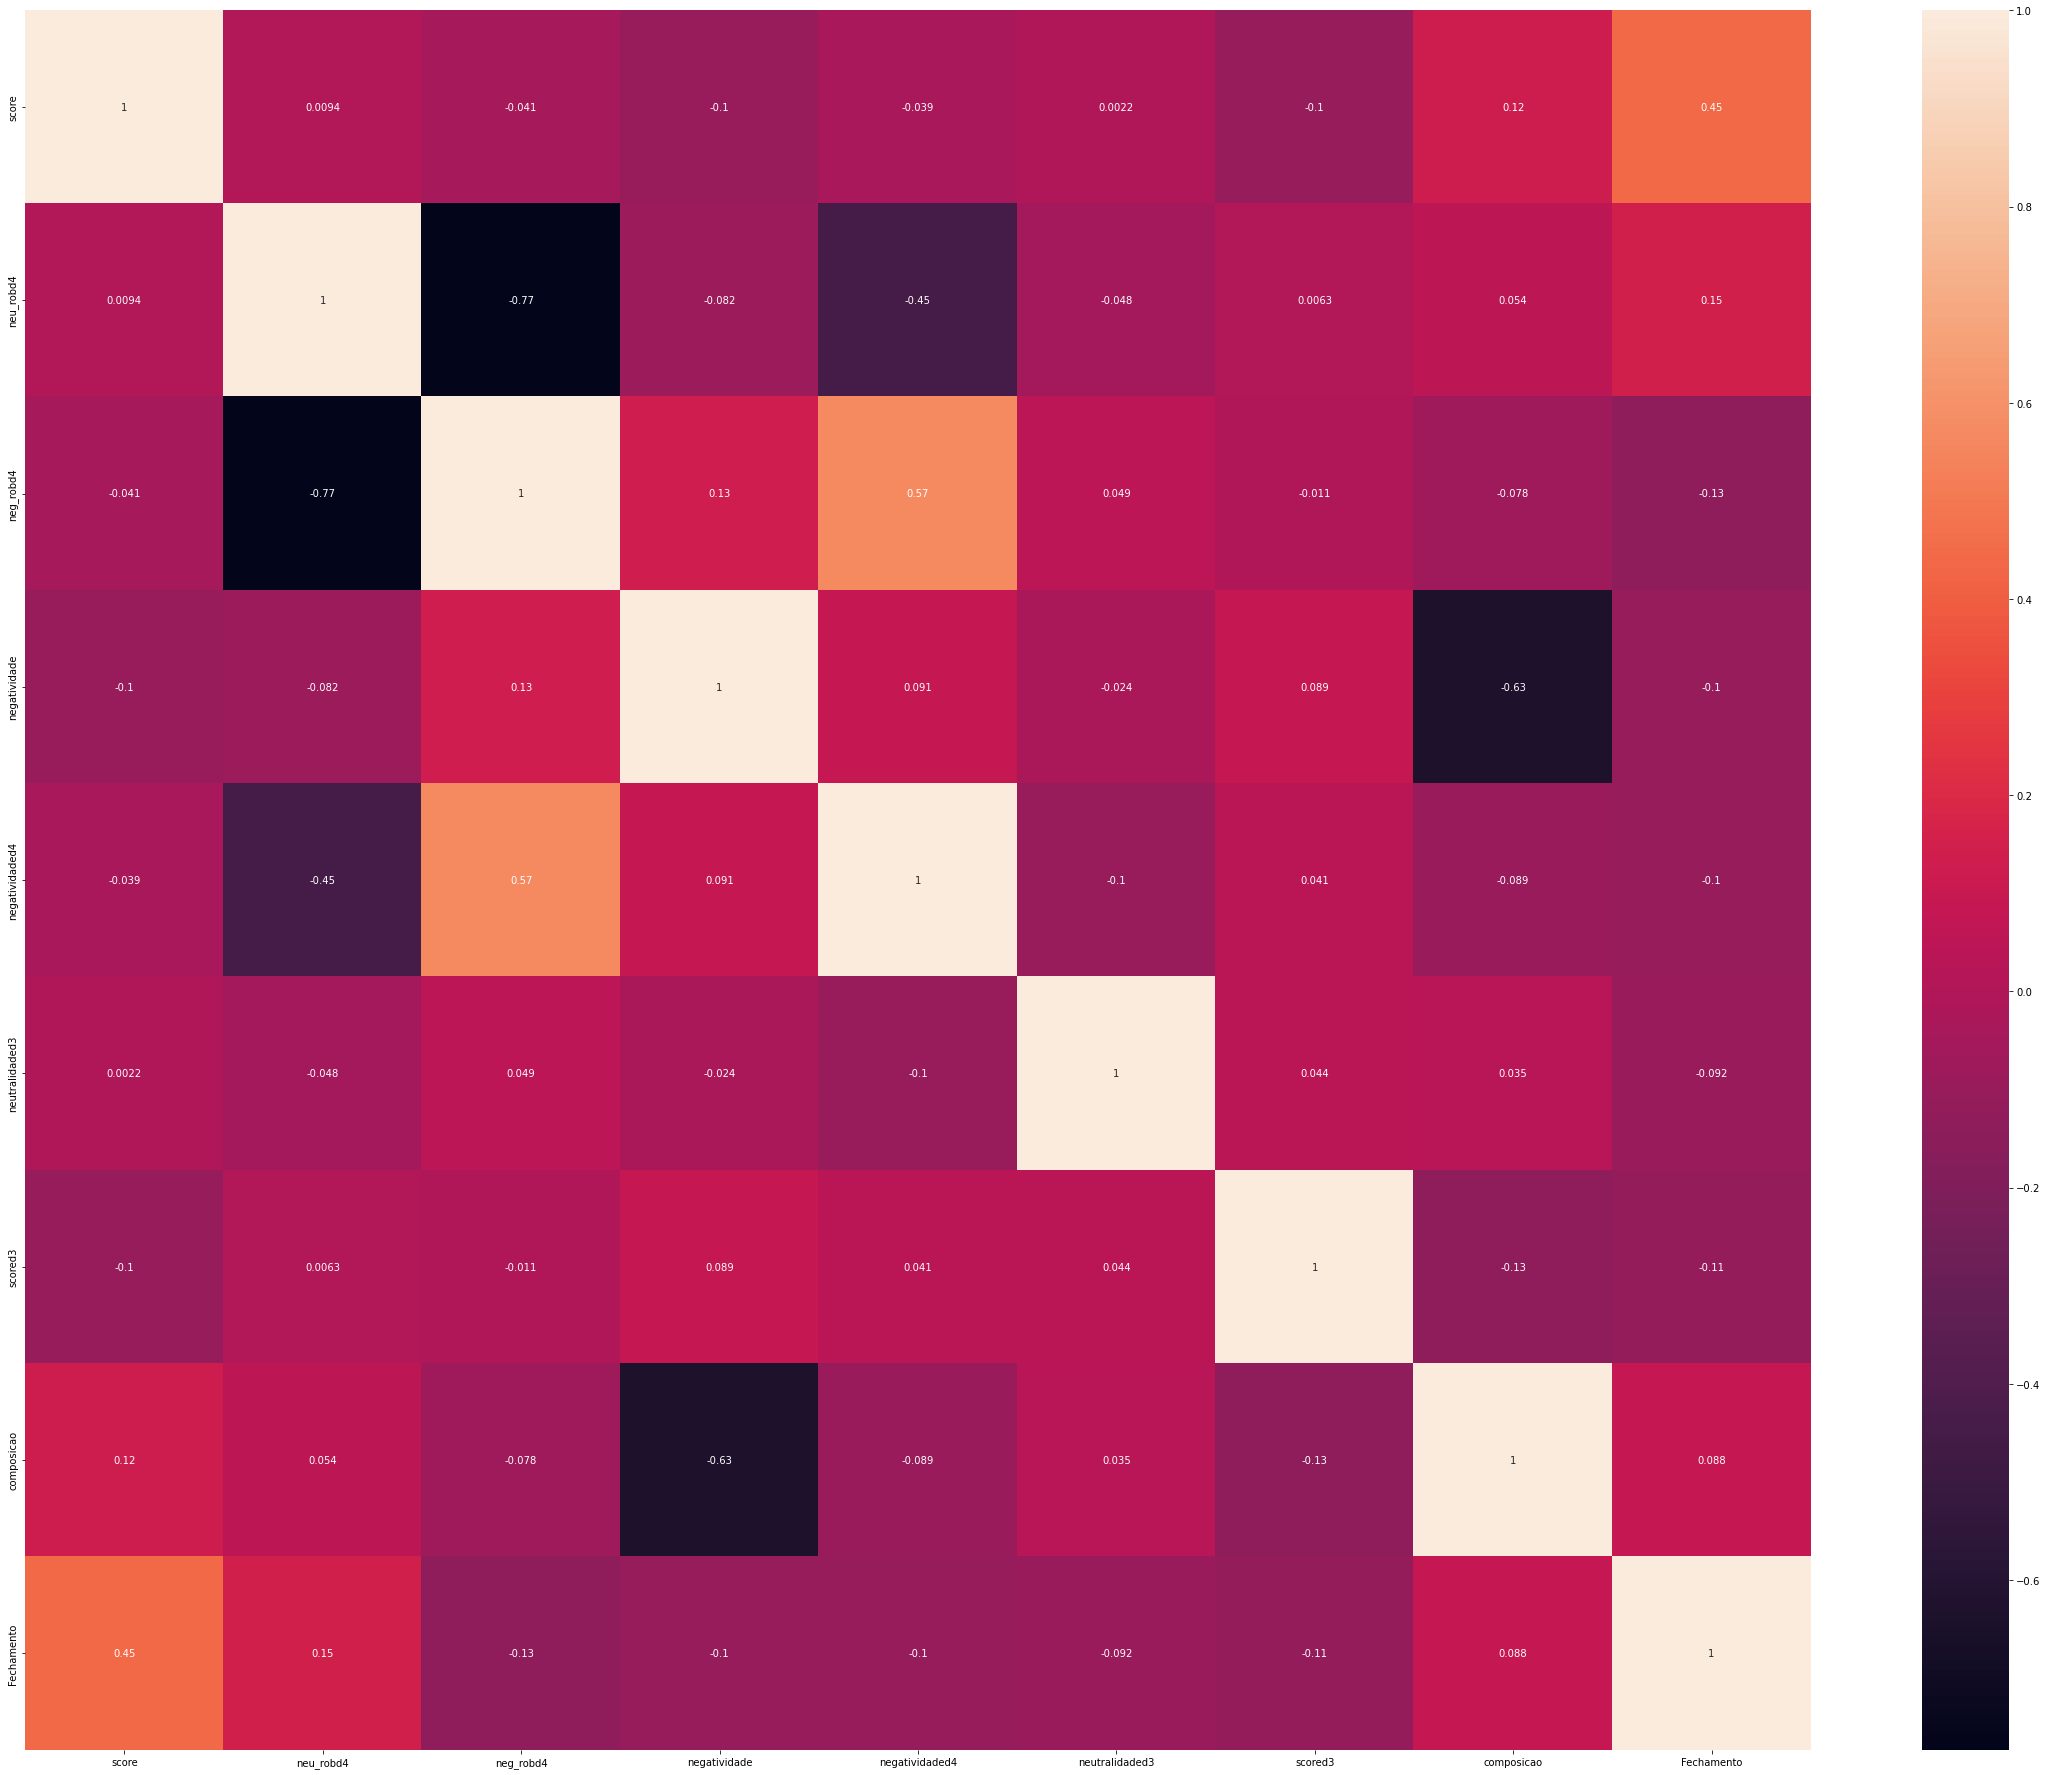

In [243]:
plt.figure(figsize=(40,32))
sns.heatmap(df_analise[conjunto_features_corr+variavel_alvo].corr(),annot=True)
plt.show()

As features composição e negatividade possuem alta correlação 0.63;  
As features neg_robd4 e negatividaded4 possuem alta correlação 0.57;  
As features neg_robd4 e neu_robd4 possuem alta correlação 0.77;  

## Itera sobre o conjunto das features do dia atual e de dia anteriores para descobrir a melhor combinação

In [256]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

df_models = pd.DataFrame()
    
for i in range(0,30,1):
    #X = df_analise[['score','neu_robd4','neg_robd4','scored3','negatividade','negatividaded4','neutralidaded3','composicao']]
    #X = df_analise[['score','neu_robd4','neg_robd4','scored3','negatividade','negatividaded4','neutralidaded3']]
    #X = df_analise[['score','neu_robd4','neg_robd4','scored3','negatividade','negatividaded4','composicao']]
    #X = df_analise[['score','neu_robd4','neg_robd4','scored3','negatividade','negatividaded4']]  
    #X = df_analise[['score','neu_robd4','neg_robd4','scored3','negatividaded4','composicao']]
    #X = df_analise[['score','neu_robd4','scored3','negatividade','negatividaded4','composicao']]
    #X = df_analise[['score','neg_robd4','scored3','negatividade','negatividaded4','composicao']]
    #X = df_analise[['score','neu_robd4','scored3','negatividade','negatividaded4']]
    X = df_analise[['score','neu_robd4','scored3','negatividade']] ### >
    #X = df_analise[['score','neu_robd4','scored3']]
    #X = df_analise[['score','neu_robd4']]

    
    y = df_analise[variavel_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True)  

df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
LogisticRegression                 0.72               0.72     0.72      0.72
CalibratedClassifierCV             0.72               0.72     0.72      0.72
LinearSVC                          0.72               0.72     0.72      0.72
NearestCentroid                    0.72               0.72     0.72      0.72
RidgeClassifierCV                  0.72               0.72     0.72      0.72
LinearDiscriminantAnalysis         0.72               0.72     0.72      0.72
RidgeClassifier                    0.72               0.72     0.72      0.72
GaussianNB                         0.71               0.71     0.71      0.71
RandomForestClassifier             0.70               0.70     0.70      0.70
BaggingClassifier                  0.69               0.69     0.69      0.69
QuadraticDiscriminantAnalysis      0.69               0.69     0.69      0.69
ExtraTreesClassifier               0.69               0.69     0.69      0.69
SVC                                0.69               0.69     0.69      0.69
BernoulliNB                        0.68               0.68     0.68      0.68
XGBClassifier                      0.68               0.68     0.68      0.68
AdaBoostClassifier                 0.68               0.68     0.68      0.68
LGBMClassifier                     0.68               0.68     0.68      0.67
NuSVC                              0.68               0.68     0.68      0.68
DecisionTreeClassifier             0.66               0.66     0.66      0.66
SGDClassifier                      0.65               0.65     0.65      0.64
Perceptron                         0.63               0.63     0.63      0.62
KNeighborsClassifier               0.63               0.63     0.63      0.63
LabelSpreading                     0.63               0.63     0.63      0.63
LabelPropagation                   0.63               0.63     0.63      0.63
ExtraTreeClassifier                0.63               0.63     0.63      0.63
PassiveAggressiveClassifier        0.62               0.62     0.62      0.61
DummyClassifier                    0.51               0.51     0.51      0.51

['score','neu_robd4','scored3','negatividade'] é o conjunto de features mais efetivo, no entanto,

Iremos testar esse conjunto de features com PCA e normalização

In [258]:
conjunto1 = ['score','neu_robd4','scored3','negatividade']

In [259]:
#Criando um dicionário com o conjunto de features
feature_conjunto = {'conjunto1': conjunto1}


In [260]:
df_models = pd.DataFrame()

## repetir o experimento 30x 
for rep in range(0,30,1):
    
    print("Repeticão = %s!" % rep)
    
    ## iterar sobre o conjunto de features entre a data e o dia -n (para 1<=n<=4)
    for k in feature_conjunto.keys():
    
        #Lista de features consideradas e definição de X e Y:
        lista_features = feature_conjunto[k]
        X = df_final99[lista_features]
        y = df_final99['Fechamento']  
    
        #Holdout em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
           
    
         #Testando sem PCA e sem Normalizacao
        #print("Testando para conjunto de features %s!" % k)
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train, x_test, y_train, y_test)
        models['conjunto_features'] = k
        models['n_PCA'] = "N/A"
        models['Normalizado'] = False
        models['repeticao'] = rep
        df_models = df_models.append(models.reset_index(), ignore_index=True)
        
        
    
        ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
        for i in range(2,len(X.columns),1):
    
            #Aplicando PCA
            pca = PCA(n_components=i)
            x_train_pca = pca.fit_transform(x_train)
            x_test_pca = pca.fit_transform(x_test)
    
            #Aplicando Normalização
            scaler_train = StandardScaler()
            scaler_test = StandardScaler()

            scaler_train.fit(x_train_pca)
            scaler_test.fit(x_test_pca)

            x_train_pca_normalized = scaler_train.transform(x_train_pca)
            x_test_pca_normalized = scaler_test.transform(x_test_pca)


            #Testando PCA + normalizado
            print("Testando para conjunto de features %s com PCA = %s e Normalização - Rep %s!" % (k,i,rep)) 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i
            models['Normalizado'] = True
            models['repeticao'] = rep
        
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)
    
            #Testando PCA
            #print("Testando para conjunto de features %s com PCA = %s! - Rep %s" % (k,i,rep))
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['Normalizado'] = False
            models['repeticao'] = rep
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)    


Repeticão = 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Repeticão = 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Repeticão = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Repeticão = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Repeticão = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Repeticão = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Repeticão = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.34it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Repeticão = 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Repeticão = 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Repeticão = 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Repeticão = 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.89it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Repeticão = 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Repeticão = 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Repeticão = 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Repeticão = 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Repeticão = 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Repeticão = 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.19it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Repeticão = 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Repeticão = 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Repeticão = 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.97it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Repeticão = 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Repeticão = 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.13it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.09it/s]


Repeticão = 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Repeticão = 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.75it/s]


Repeticão = 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Repeticão = 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.00it/s]


Repeticão = 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Repeticão = 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Repeticão = 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Repeticão = 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


In [261]:
df_models.groupby(['Model','conjunto_features','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                         conjunto_features n_PCA Normalizado             
LogisticRegression            conjunto1         N/A   False            0.72   
NearestCentroid               conjunto1         N/A   False            0.72   
LinearSVC                     conjunto1         N/A   False            0.71   
CalibratedClassifierCV        conjunto1         N/A   False            0.71   
RidgeClassifierCV             conjunto1         N/A   False            0.71   
LinearDiscriminantAnalysis    conjunto1         N/A   False            0.71   
RidgeClassifier               conjunto1         N/A   False            0.71   
RandomForestClassifier        conjunto1         N/A   False            0.71   
GaussianNB                    conjunto1         N/A   False            0.70   
ExtraTreesClassifier          conjunto1         N/A   False            0.70   
BaggingClassifier             conjunto1         N/A   False            0.70   
SVC                           conjunto1         N/A   False            0.69   
QuadraticDiscriminantAnalysis conjunto1         N/A   False            0.69   
LGBMClassifier                conjunto1         N/A   False            0.68   
XGBClassifier                 conjunto1         N/A   False            0.68   
AdaBoostClassifier            conjunto1         N/A   False            0.68   
BernoulliNB                   conjunto1         N/A   False            0.67   
NuSVC                         conjunto1         N/A   False            0.67   
DecisionTreeClassifier        conjunto1         N/A   False            0.66   
Perceptron                    conjunto1         N/A   False            0.64   
ExtraTreeClassifier           conjunto1         N/A   False            0.64   
KNeighborsClassifier          conjunto1         N/A   False            0.63   
PassiveAggressiveClassifier   conjunto1         N/A   False            0.63   
LabelSpreading                conjunto1         N/A   False            0.63   
LabelPropagation              conjunto1         N/A   False            0.63   
SGDClassifier                 conjunto1         N/A   False            0.62   
RidgeClassifier               conjunto1         3     True             0.52   
LinearDiscriminantAnalysis    conjunto1         3     True             0.52   
LogisticRegression            conjunto1         3     True             0.52   
LinearSVC                     conjunto1         3     True             0.52   
CalibratedClassifierCV        conjunto1         3     True             0.52   
GaussianNB                    conjunto1         3     True             0.52   
QuadraticDiscriminantAnalysis conjunto1         3     True             0.52   
RidgeClassifier               conjunto1         3     False            0.52   
LinearDiscriminantAnalysis    conjunto1         3     False            0.52   
NearestCentroid               conjunto1         3     True             0.52   
CalibratedClassifierCV        conjunto1         3     False            0.52   
RidgeClassifierCV             conjunto1         3     False            0.52   
                                                      True             0.52   
QuadraticDiscriminantAnalysis conjunto1         3     False            0.52   
LinearSVC                     conjunto1         3     False            0.52   
GaussianNB                    conjunto1         3     False            0.52   
NearestCentroid               conjunto1         3     False            0.52   
LogisticRegression            conjunto1         3     False            0.52   
SVC                           conjunto1         3     True             0.52   
                                                      False            0.51   
BaggingClassifier             conjunto1         3     False            0.51   
NuSVC                         conjunto1         3     True             0.51   
BaggingClassifier             conjunto1         3     True             0.51   
Perceptron                    conjunto

In [262]:
df_analise.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x',
       'polaridade', 'subjetividade', 'negatividade', 'neutralidade',
       'positividade', 'composicao', 'Noticias_y', 'score', 'Sentimento',
       'Noticias', 'neg_rob', 'neu_rob', 'pos_rob', 'polaridaded1',
       'polaridaded2', 'polaridaded3', 'polaridaded4', 'subjetividaded1',
       'subjetividaded2', 'subjetividaded3', 'subjetividaded4',
       'negatividaded1', 'negatividaded2', 'negatividaded3', 'negatividaded4',
       'neutralidaded1', 'neutralidaded2', 'neutralidaded3', 'neutralidaded4',
       'positividaded1', 'positividaded2', 'positividaded3', 'positividaded4',
       'composicaod1', 'composicaod2', 'composicaod3', 'composicaod4',
       'scored1', 'scored2', 'scored3', 'scored4', 'neg_robd1', 'neg_robd2',
       'neg_robd3', 'neg_robd4', 'neu_robd1', 'neu_robd2', 'neu_robd3',
       'neu_robd4', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4'],
      dtype='object')

## Itera sobre apenas o conjunto de features do dia atual para descobrir o melhor conjunto

In [265]:
conjunto_features_corr = ['score', 'polaridade', 'subjetividade', 'negatividade', 'neutralidade',  'positividade', 'composicao', 'neg_rob', 'neu_rob', 'pos_rob']
variavel_alvo = ['Fechamento']

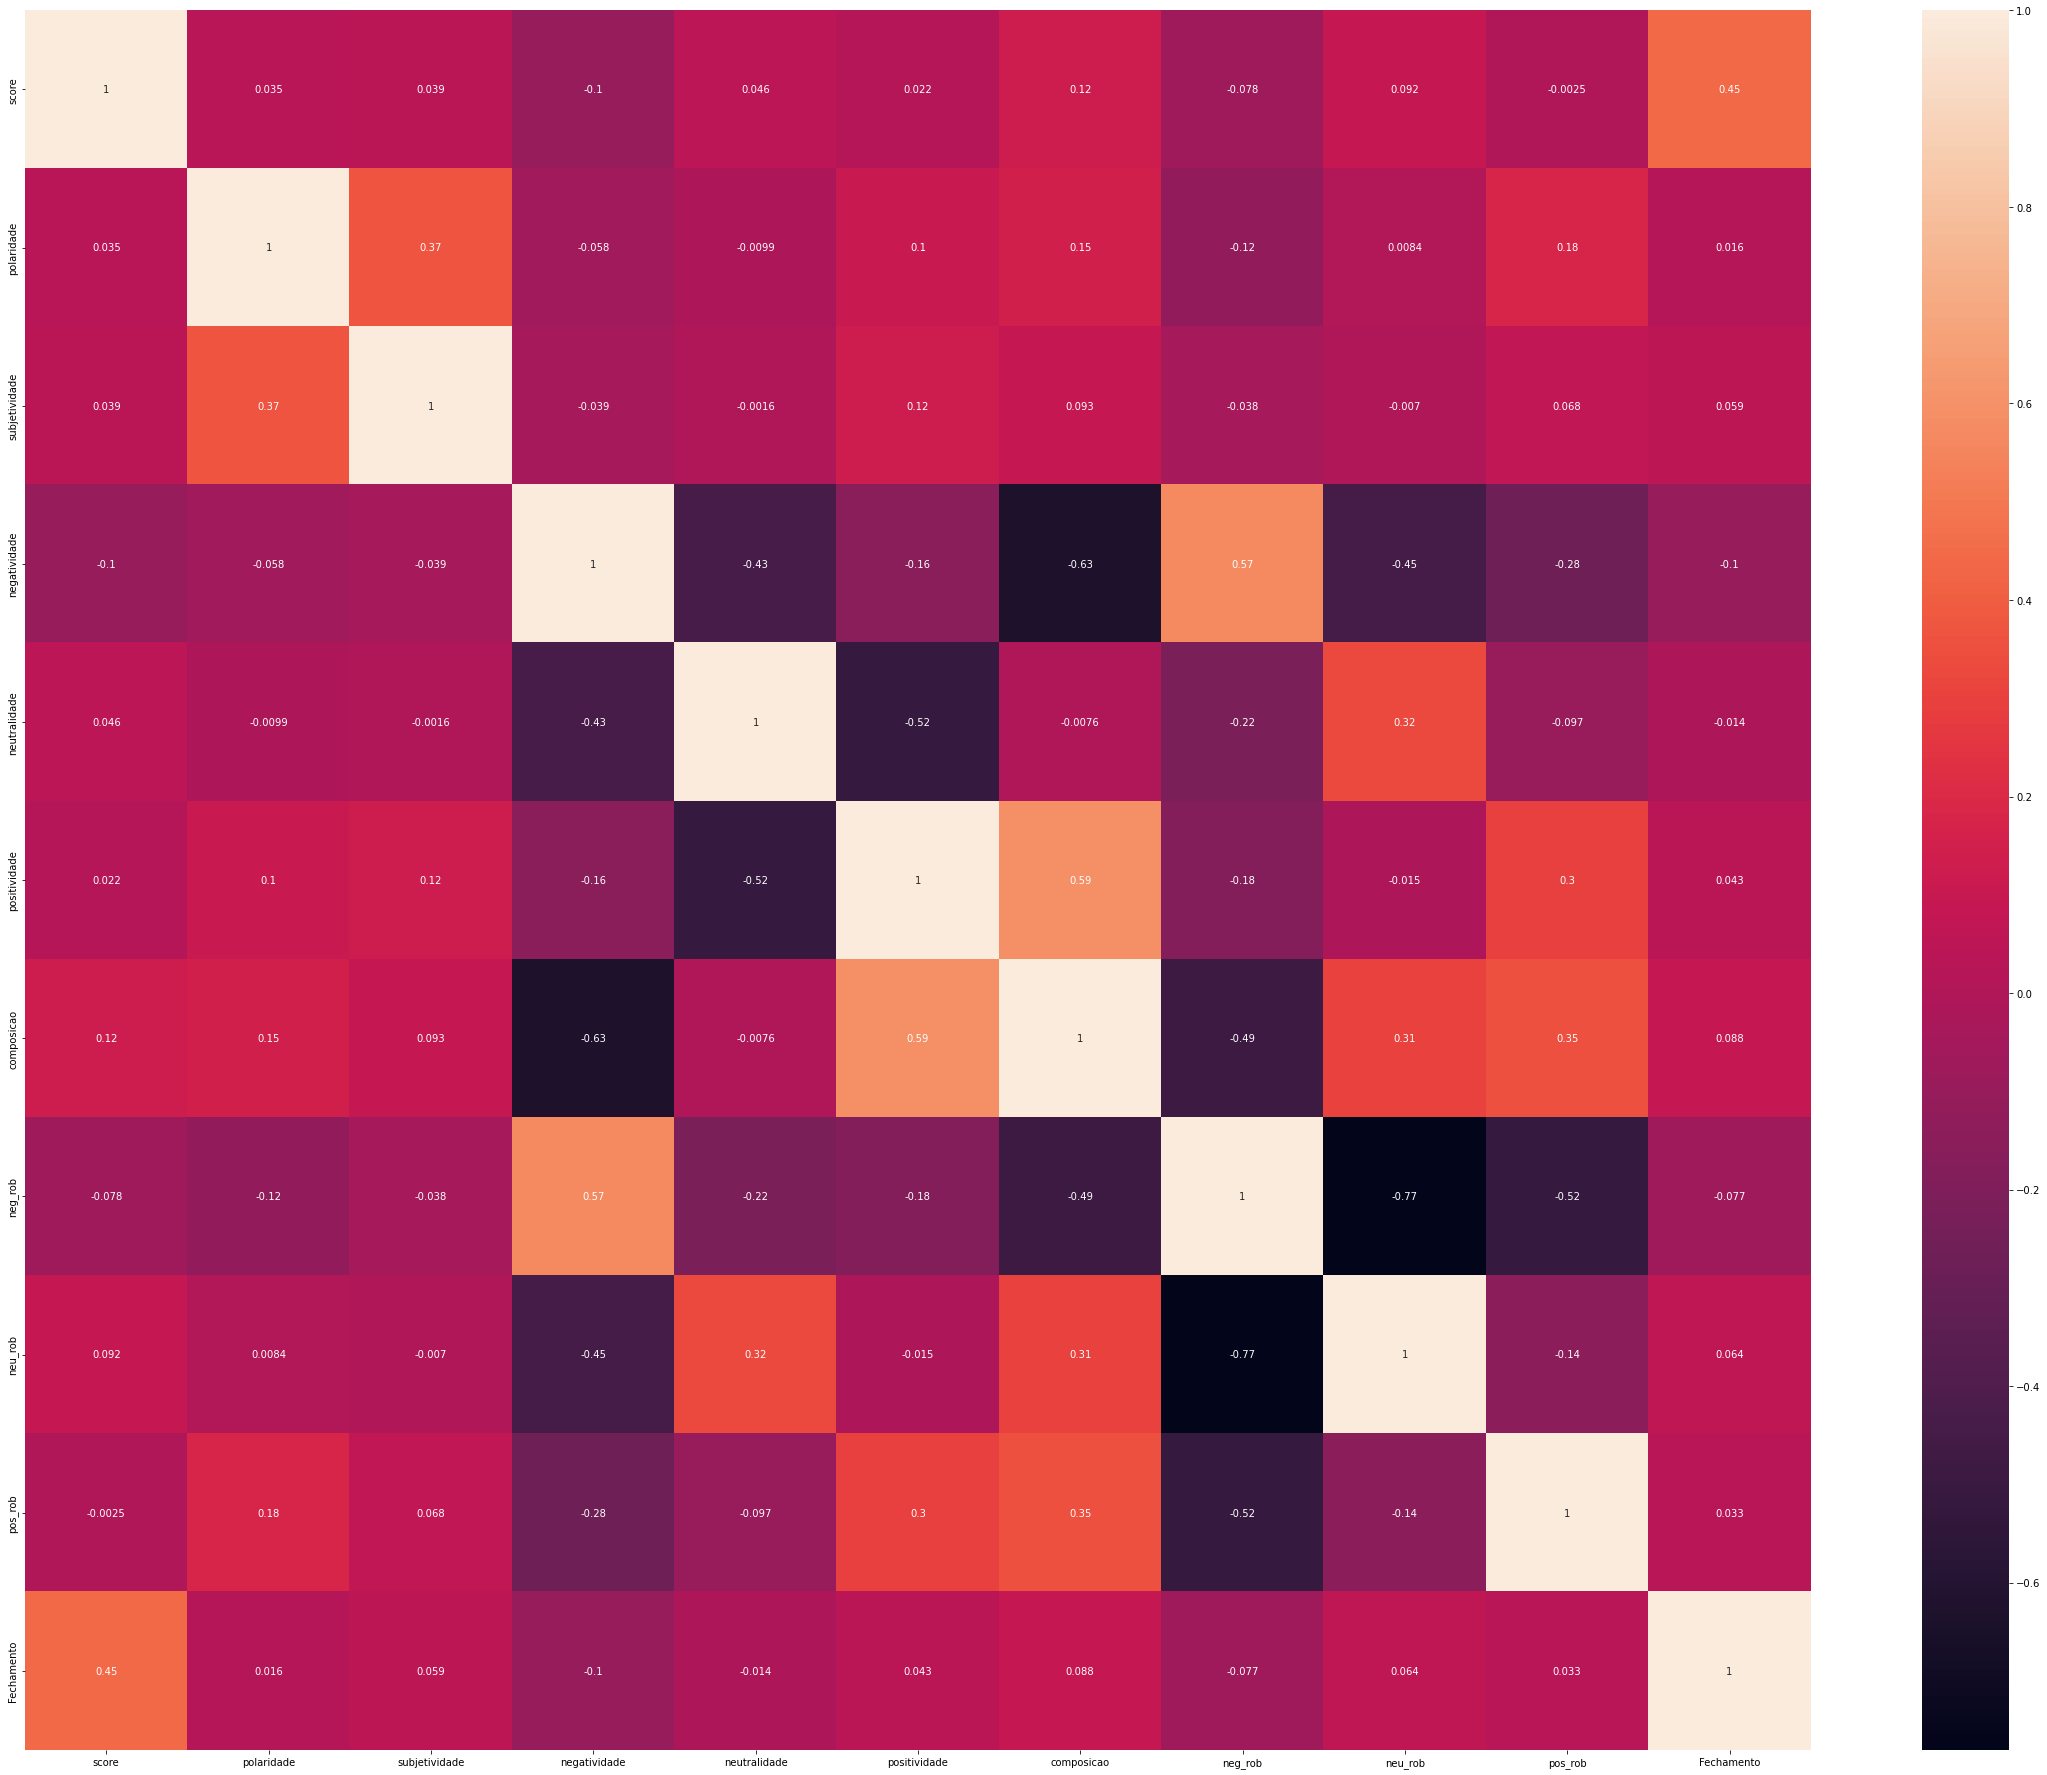

In [266]:
plt.figure(figsize=(40,32))
sns.heatmap(df_analise[conjunto_features_corr+variavel_alvo].corr(),annot=True)
plt.show()

In [267]:
df_analise[conjunto_features_corr+variavel_alvo].corr().sort_values(by = "Fechamento", ascending = True).head(10)

score  polaridade  subjetividade  negatividade  neutralidade  \
negatividade   -0.10       -0.06          -0.04          1.00         -0.43   
neg_rob        -0.08       -0.12          -0.04          0.57         -0.22   
neutralidade    0.05       -0.01          -0.00         -0.43          1.00   
polaridade      0.03        1.00           0.37         -0.06         -0.01   
pos_rob        -0.00        0.18           0.07         -0.28         -0.10   
positividade    0.02        0.10           0.12         -0.16         -0.52   
subjetividade   0.04        0.37           1.00         -0.04         -0.00   
neu_rob         0.09        0.01          -0.01         -0.45          0.32   
composicao      0.12        0.15           0.09         -0.63         -0.01   
score           1.00        0.03           0.04         -0.10          0.05   

               positividade  composicao  neg_rob  neu_rob  pos_rob  Fechamento  
negatividade          -0.16       -0.63     0.57    -0.45    -0.28       -0.10  
neg_rob               -0.18       -0.49     1.00    -0.77    -0.52       -0.08  
neutralidade          -0.52       -0.01    -0.22     0.32    -0.10       -0.01  
polaridade             0.10        0.15    -0.12     0.01     0.18        0.02  
pos_rob                0.30        0.35    -0.52    -0.14     1.00        0.03  
positividade           1.00        0.59    -0.18    -0.01     0.30        0.04  
subjetividade          0.12        0.09    -0.04    -0.01     0.07        0.06  
neu_rob               -0.01        0.31    -0.77     1.00    -0.14        0.06  
composicao             0.59        1.00    -0.49     0.31     0.35        0.09  
score                  0.02        0.12    -0.08     0.09    -0.00        0.45

As seguintes features são as que possui maior correlação com o Fechamento:

- score +0.45
- negatividade -0.10
- composicao +0.09
- neg_rob -0.08
- neu_rob +0,06
- subjetividade +0,06

As outras features possuem baixa correlação com Fechamento:

- positividade +0,04
- pos_rob +0.03
- polaridade +0.02
- neutralidade -0.01


Conjunto total de features do dia atual
['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob','polaridade','neutralidade]


As features neutralidade e neu_rob +0.32
As features neutralidade e positividade -0.52
As features neutralidade e negatividade -0.43
As features negatividade e pos_rob
As features negatividade e neu_rob
As features negatividade e neg_rob
As features negatividade e composicao
As features negatividade e neutralidade


In [279]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

df_models = pd.DataFrame()
    
for i in range(0,30,1):
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob','polaridade','neutralidade']]
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob','polaridade']]
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob']] 
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade']]
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade']]     
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob']]  
    #X = df_analise[['score','negatividade','composicao','neg_rob']] ##
    #X = df_analise[['score','negatividade','composicao']] 
    X = df_analise[['score','negatividade']] ###
    #X = df_analise[['score']]
    #X = df_analise[['score','negatividade','neg_rob']]
    #X = df_analise[['score','negatividade','neg_rob','subjetividade']]
    
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob','polaridade','neutralidade']]
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob','polaridade','neutralidade']]
    #X = df_analise[['score','negatividade','composicao','neg_rob','neu_rob','subjetividade','positividade','pos_rob','polaridade','neutralidade']]
    
    y = df_analise[variavel_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True)  

df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
GaussianNB                         0.68               0.68     0.68      0.68
QuadraticDiscriminantAnalysis      0.68               0.68     0.68      0.68
NearestCentroid                    0.68               0.68     0.68      0.68
BernoulliNB                        0.68               0.68     0.68      0.68
CalibratedClassifierCV             0.68               0.68     0.68      0.68
RidgeClassifierCV                  0.68               0.68     0.68      0.67
RidgeClassifier                    0.68               0.68     0.68      0.67
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.67
LogisticRegression                 0.68               0.68     0.68      0.67
LinearSVC                          0.68               0.68     0.68      0.67
SVC                                0.67               0.67     0.67      0.66
LabelPropagation                   0.66               0.66     0.66      0.66
LabelSpreading                     0.66               0.66     0.66      0.66
BaggingClassifier                  0.66               0.66     0.66      0.65
DecisionTreeClassifier             0.66               0.65     0.65      0.65
ExtraTreeClassifier                0.66               0.65     0.65      0.65
ExtraTreesClassifier               0.66               0.65     0.65      0.65
AdaBoostClassifier                 0.66               0.65     0.65      0.65
XGBClassifier                      0.66               0.65     0.65      0.65
LGBMClassifier                     0.66               0.65     0.65      0.65
RandomForestClassifier             0.65               0.65     0.65      0.65
KNeighborsClassifier               0.65               0.65     0.65      0.64
SGDClassifier                      0.62               0.62     0.62      0.58
PassiveAggressiveClassifier        0.61               0.61     0.61      0.55
Perceptron                         0.60               0.60     0.60      0.55
NuSVC                              0.57               0.56     0.56      0.56
DummyClassifier                    0.51               0.51     0.51      0.51

## Conclusão

- Considerando o conjunto de features de dias anteriores:
        O conjunto composto por todas as features do dia + 1 dia anterior apresentou maior performance de classificação   (top 5 algoritmos Acurácia entre 58 e 56%)
        conjunto = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade', 'positividade', 'composicao', 'score', 'neg_rob', 'neu_rob', 'pos_rob', 'polaridaded1', 'subjetividaded1', 'negatividaded1', 'neutralidaded1', 'positividaded1', 'composicaod1', 'scored1', 'neg_robd1', 'neu_robd1', 'pos_robd1']



- Considerando a melhor seleção das features do conjunto de features de dias anteriores:
        O conjunto 1 apresenta maior performance de classificação sem PCA e sem normalização  (top 5 algoritmos Acurácia 72%) sendo:
        conjunto1 = ['score','neu_robd4','scored3','negatividade']
        
        NearestCentroid	
        SVC	
        LogisticRegression
        RidgeClassifierCV	
        LinearDiscriminantAnalysis	
        
- Considerando o conjunto de features apenas do dia atual:
        O conjunto de features apenas das noticais do dia atual performou melhor (Acurácia entre 58% e 56%).
    
        features = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade', 'positividade', 'composicao', 'score', 'neg_rob', 'neu_rob', 'pos_rob']
        

- Considerando a melhor seleção das features do conjunto de features do dia atual apenas:
        O conjunto que melhor performou foi o que apresentou acurácia ficou em 68%
        
        features = ['score','negatividade']


## Analise de separabilidade das classes

In [543]:
featurefechamento = ['Fechamento']

In [544]:
conjuntofeatures = features+featuresd1+featuresd2+featuresd3

In [546]:
#sns.pairplot(df_analise[featurefechamento+conjuntofeatures], hue = 'Fechamento' )

In [ ]:
for i in conjuntofeatures:
    g = sns.FacetGrid(df_analise, sharex = True, sharey = False, hue = 'Fechamento',  )
    g.map_dataframe(sns.histplot, x = i)

Não há uma separabilidade evidente entre os dias com fechamento em baixa ou alta das ações da petrobras para cada feature gerada e atrelada às noticias

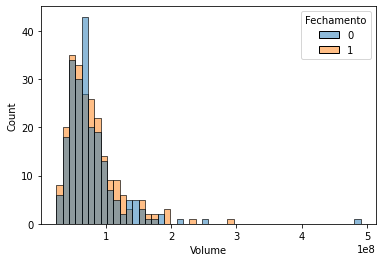

In [547]:
sns.histplot(df_analise, x = "Volume", hue = "Fechamento")

## Analise de frequência de palavras

In [548]:
a = df_final2['Noticias']
list(a)
b = a.values[0]

In [549]:
#!pip install nltk

In [550]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [551]:
frase = b

In [552]:
palavras = nltk.word_tokenize(frase)

In [553]:
from nltk import FreqDist
frequencia = FreqDist(frase)

### Criando uma lista com as noticias de todos os dias

In [554]:
a = df_final2['Noticias']
a = list(a)
len(a)

447

In [555]:
c = ""
for i in a:
    c += i

In [556]:
frase = c
palavras = nltk.word_tokenize(frase)

In [557]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(80)

[('petrobras', 2451),
 ('de', 1942),
 ('da', 1123),
 ('e', 828),
 (',', 818),
 ('em', 622),
 ('para', 504),
 ('a', 496),
 ('do', 477),
 ('...', 469),
 ('no', 377),
 ('na', 372),
 ('com', 316),
 ('$', 264),
 (':', 254),
 ('%', 251),
 ('que', 249),
 ('venda', 227),
 ('por', 225),
 ('(', 219),
 (')', 217),
 ('o', 212),
 ('r', 188),
 ('diz', 168),
 ('gás', 164),
 ('mais', 158),
 ('gasolina', 147),
 ('petróleo', 145),
 (';', 134),
 ('preço', 128),
 ('é', 124),
 ('petr4', 121),
 ('bolsonaro', 120),
 ('não', 113),
 ('campos', 103),
 ('ações', 102),
 ('após', 99),
 ('preços', 95),
 ('diesel', 94),
 ('à', 94),
 ('refinaria', 90),
 ('vai', 88),
 ('pela', 88),
 ('refinarias', 84),
 ('anuncia', 83),
 ('us', 80),
 ('bacia', 77),
 ('sobre', 75),
 ('dos', 73),
 ('combustíveis', 73),
 ('ao', 70),
 ('campo', 70),
 ('vale', 69),
 ('bi', 69),
 ('tem', 68),
 ('milhões', 64),
 ('produção', 62),
 ('se', 62),
 ('até', 62),
 ('pré-sal', 62),
 ('alta', 62),
 ('contrato', 62),
 ('pode', 61),
 ('bilhões', 60),
 

### Remoçao de stopwords

In [558]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [559]:
def Removestopwords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [560]:

caracteres = [",","...", "("," )" ,":", "$",  "%",  ";", "'", "(PETR4)", "PETR4", "petr4","(petr4)" ]

In [561]:
d = Removestopwords(c)

### Remove Caracteres

In [562]:
carac = "!@#$;:,%')(?’‘"
for i in range(0,len(carac)):
     d =d.replace(carac[i],"")

In [563]:
carac2 = "..."
for i in range(0,len(carac2)):
     d =d.replace(carac2[i],"")

In [564]:
frase = d
palavras = nltk.word_tokenize(frase)

In [565]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(150)

[('petrobras', 2450),
 ('venda', 226),
 ('r', 181),
 ('diz', 168),
 ('gás', 164),
 ('gasolina', 147),
 ('petróleo', 145),
 ('preço', 128),
 ('bolsonaro', 120),
 ('petr4', 116),
 ('campos', 103),
 ('ações', 102),
 ('após', 99),
 ('diesel', 96),
 ('preços', 95),
 ('refinaria', 90),
 ('vai', 88),
 ('refinarias', 84),
 ('anuncia', 83),
 ('bacia', 77),
 ('us', 76),
 ('sobre', 75),
 ('combustíveis', 73),
 ('campo', 71),
 ('vale', 69),
 ('bi', 69),
 ('milhões', 64),
 ('produção', 62),
 ('pré-sal', 62),
 ('alta', 62),
 ('contrato', 62),
 ('pode', 61),
 ('bilhões', 60),
 ('dividendos', 57),
 ('presidente', 56),
 ('novo', 54),
 ('política', 54),
 ('brasil', 52),
 ('plataforma', 50),
 ('plataformas', 50),
 ('vende', 48),
 ('rio', 47),
 ('offshore', 46),
 ('vender', 46),
 ('governo', 46),
 ('mercado', 46),
 ('bahia', 44),
 ('lucro', 44),
 ('contratos', 43),
 ('maior', 43),
 ('fecha', 41),
 ('contra', 41),
 ('reajuste', 41),
 ('empresa', 40),
 ('vagas', 40),
 ('empresas', 39),
 ('privatização', 39)

In [566]:
type(fdist.most_common(15)[1])

tuple

In [567]:
# Cria uma lista das n palavras mais frequentes
mais_frequentes = []
frequencia_values = []

for tupla in fdist.most_common(15):     ## fdist.most_common(15) retorna 15 palavras mais frequentes
    mais_frequentes.append(tupla[0])
    frequencia_values.append(tupla[1])

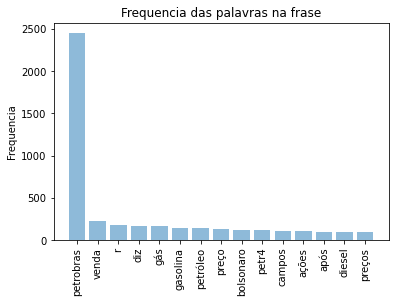

In [188]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

palavras = mais_frequentes
y_pos = np.arange(len(palavras))
contagem = frequencia_values

plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras,rotation='vertical' )
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()

## Encontrando correlação palavras mais frequentes vs fechamento

In [189]:
df_palavras = df_final2.copy()
df_palavras.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  
0   petrobras e vale retiram seus funcionários de...  
1   petrobras reduz preços do diesel e da gasolin...  
2    petrobras faz redução em produção de petróle...  
3   o adeus da petrobras ao amazonas petrobras vê...  
5   refinarias da petrobras apresentam queda na c...

In [291]:
# Cria uma lista das n palavras mais frequentes
mais_frequentes = []
frequencia_values = []

for tupla in fdist.most_common(500):     ## fdist.most_common(15) retorna 15 palavras mais frequentes
    
    if tupla[0] not in ["``","''","resultado"]:            ## CONDIÇÃO NECESSÁRIA PARA NÃO DAR ERRO NO DATAFRAME POSTERIORMENTE

        mais_frequentes.append(tupla[0])
        frequencia_values.append(tupla[1])

In [292]:
## Cria uma coluna no df com cada palavra retornada no passo anterior
for palavra in mais_frequentes:
    df_palavras[palavra] = df_palavras['Noticias'].apply(lambda x: 1 if palavra in x else 0)
df_palavras.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2020-01-02      20.47  37774500  0.02           1   
1 2020-01-03      20.30  71595600 -0.01           0   
2 2020-01-06      20.54  81844000  0.01           1   
3 2020-01-07      20.46  32822000 -0.00           0   
5 2020-01-09      20.27  36102700 -0.00           0   

                                            Noticias  petrobras  venda  r  \
0   petrobras e vale retiram seus funcionários de...          1      1  1   
1   petrobras reduz preços do diesel e da gasolin...          1      0  1   
2    petrobras faz redução em produção de petróle...          1      1  1   
3   o adeus da petrobras ao amazonas petrobras vê...          1      0  1   
5   refinarias da petrobras apresentam queda na c...          1      0  1   

   diz  ...  evita  atmosfera  devolvido  picpay  1500  reverter  \
0    0  ...      0          0          0       0     0         0   
1    0  ...      0          0          0       0     0         0   
2    0  ...      0          0          0       0     0         0   
3    0  ...      0          0          0       0     0         0   
5    0  ...      0          0          0       0     0         0   

   surpreendida  enche  influenciará  278  
0             0      0             0    0  
1             0      0             0    0  
2             0      0             0    0  
3             0      0             0    0  
5             0      0             0    0  

[5 rows x 4573 columns]

In [293]:
## Plotando as tendencias de baixa e queda por palavra:

#for palavra in mais_frequentes:

    #sns.catplot(data=df_palavras[df_palavras[palavra]==1], x=palavra, hue = 'Fechamento', kind="count", height=2.5, aspect=.8)

In [302]:
qtde_alta = []
qtde_baixa = []
tendencia_alta_valores = []
lista_polaridade = []

for palavra in mais_frequentes:
    
    #print(palavra)
    #Filtrando a quantidade de fechamentos alta/baixa por palavra
    serie = df_palavras[df_palavras[str(palavra)]==1].Fechamento.value_counts()
    
    #Encontrando qtde de registros de alta e de baixa
    baixas = serie[0]
    altas = serie[1]
    total = serie[0]+serie[1]
    tendencia_alta = altas/total
    
    #Verificando se há polaridade atribuida a essa palavra no dicionário sentilex
    pola = dic_palavra_polaridade.get('palavra')
    
    #Armazenando os resultados
    qtde_alta.append(altas)
    qtde_baixa.append(baixas)
    tendencia_alta_valores.append(tendencia_alta)
    lista_polaridade.append(pola)

In [303]:
df_palavras_freq = pd.DataFrame(list(zip(mais_frequentes, frequencia_values,qtde_alta,qtde_baixa,tendencia_alta_valores,lista_polaridade)),
               columns =['palavra', 'frequencia_df','qtde_alta','qtde_baixa', '%_tendencia_alta',' polaridade_sentilex' ])

## Palavras associadas a um viés de alta no valor das ações
df_palavras_freq.sort_values(by = "%_tendencia_alta", ascending = False).head(50)

palavra  frequencia_df  qtde_alta  qtde_baixa  %_tendencia_alta  \
418             vale3              8          7           1              0.88   
392              rlam              8          7           1              0.88   
467         biodiesel              7          6           1              0.86   
461            milhão              7          6           1              0.86   
449                df              7          6           1              0.86   
458         diretoria              7          6           1              0.86   
483             verde              7          5           1              0.83   
417          famílias              8          4           1              0.80   
184            afirma             16         16           4              0.80   
235           defende             13         12           3              0.80   
320             vídeo              9          8           2              0.80   
471            barris              7          7           2              0.78   
344            assume              9          7           2              0.78   
358              alto              9          7           2              0.78   
148              2022             19         13           4              0.76   
256          albacora             12          6           2              0.75   
223          primeiro             13          9           3              0.75   
445          diretora              7          3           1              0.75   
234             final             13         12           4              0.75   
481             falta              7          6           2              0.75   
397           reduzir              8          9           3              0.75   
182           decisão             16         11           4              0.73   
154           redução             18         11           4              0.73   
70             partir             36         24           9              0.73   
126            búzios             23         16           6              0.73   
245             troca             12          8           3              0.73   
239            atinge             12          8           3              0.73   
437               fup              7          5           2              0.71   
447  desabastecimento              7          5           2              0.71   
370             norte              8          5           2              0.71   
431             novas              7          5           2              0.71   
488          pretende              7          5           2              0.71   
185           sergipe             16         12           5              0.71   
287                dá             11          7           3              0.70   
303              fará             10          7           3              0.70   
228               300             13          7           3              0.70   
312             mundo             10          7           3              0.70   
203             radar             15          9           4              0.69   
215         pagamento             14          9           4              0.69   
208          investir             14         11           5              0.69   
188             fatia             16         11           5              0.69   
169             lança             17         15           7              0.68   
450                22              7         21          10              0.68   
259            energy             12          8           4              0.67   
412              povo              8          4           2              0.67   
283             parte             11          6           3              0.67   
413             local              8         12           6              0.67   
250         orquestra             12          8           4              0.67   
275          história             11         

In [304]:
# Palavras associadas a um viés de queda no valor das ações
df_palavras_freq.sort_values(by = "%_tendencia_alta", ascending = True).head(50)

palavra  frequencia_df  qtde_alta  qtde_baixa  %_tendencia_alta  \
269       suspende             11          1          12              0.08   
366       denuncia              8          1           9              0.10   
373      analistas              8          1           7              0.12   
396          saúde              8          1           5              0.17   
311         fecham             10          2          10              0.17   
408             13              8          2          10              0.17   
278       nordeste             11          2           9              0.18   
240     atividades             12          2           8              0.20   
314  caminhoneiros             10          2           8              0.20   
429          dilma              7          1           4              0.20   
357       projetos              9          2           7              0.22   
293           dias             10          2           7              0.22   
414            têm              8          2           6              0.25   
221       prejuízo             13          3           9              0.25   
479          união              7          3           9              0.25   
323        encerra              9          3           9              0.25   
298           país             10          3           8              0.27   
285            eua             11          3           8              0.27   
248             40             12          5          13              0.28   
156           jato             18          6          15              0.29   
423      congresso              7          2           5              0.29   
410        onshore              8          2           5              0.29   
438      indústria              7          2           5              0.29   
400            sul              8          6          15              0.29   
394          cerca              8          2           5              0.29   
487    intervenção              7          2           5              0.29   
469            glp              7          2           5              0.29   
453      propostas              7          2           5              0.29   
149       programa             19          6          15              0.29   
348          baixa              9          4          10              0.29   
475         office              7          2           5              0.29   
428        emissão              7          4          10              0.29   
472         centro              7          2           5              0.29   
145           lava             19          7          17              0.29   
265       trabalho             11          3           7              0.30   
273         refino             11          3           7              0.30   
284       concurso             11          2           4              0.33   
337             pf              9          6          12              0.33   
324       espírito              9          3           6              0.33   
174          ganha             17          7          14              0.33   
189          nesta             16          5          10              0.33   
405          ficar              8          4           8              0.33   
241       dinheiro             12          4           8              0.33   
354         estado              9          7          14              0.33   
229         semana             13          5          10              0.33   
452             35              7          3           6              0.33   
139     acionistas             21          7          13              0.35   
214        comprar             14          6          11              0.35   
222          podem             13          5           9              0.36   
143      trimestre             20          5           9              0.36   

     polaridade_sentilex  
269  

In [309]:
#Armazena as palavras para inputar polaridade
palavras_input_negativo = [i for i in df_palavras_freq[df_palavras_freq["%_tendencia_alta"]<0.3].palavra]
palavras_input_positivo = [i for i in df_palavras_freq[df_palavras_freq["%_tendencia_alta"]>0.7].palavra]

In [310]:
palavras_input_negativo

['lava',
 'programa',
 'jato',
 'prejuízo',
 'atividades',
 '40',
 'suspende',
 'nordeste',
 'eua',
 'dias',
 'país',
 'fecham',
 'caminhoneiros',
 'encerra',
 'baixa',
 'projetos',
 'denuncia',
 'analistas',
 'cerca',
 'saúde',
 'sul',
 '13',
 'onshore',
 'têm',
 'congresso',
 'emissão',
 'dilma',
 'indústria',
 'propostas',
 'glp',
 'centro',
 'office',
 'união',
 'intervenção']

In [311]:
palavras_input_positivo

['partir',
 'búzios',
 '2022',
 'redução',
 'decisão',
 'afirma',
 'sergipe',
 'primeiro',
 'final',
 'defende',
 'atinge',
 'troca',
 'albacora',
 'vídeo',
 'assume',
 'alto',
 'norte',
 'rlam',
 'reduzir',
 'famílias',
 'vale3',
 'novas',
 'fup',
 'diretora',
 'desabastecimento',
 'df',
 'diretoria',
 'milhão',
 'biodiesel',
 'barris',
 'falta',
 'verde',
 'pretende']

# Avaliando correlação variavel score e fechamento com dicionário editado

In [335]:
sentilexpt_editado = open('SentiLex-lem-PT01 editado.txt','r',encoding='utf-8-sig')

In [336]:
dic_palavra_polaridade = {}
l_pal = []
for i in sentilexpt_editado.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    l_pal.append(palavra)

In [340]:
print (dic_palavra_polaridade.get('pretende')), print (dic_palavra_polaridade.get('milhão'))

1
1


(None, None)

In [339]:
print (dic_palavra_polaridade.get('vígaro'))

-1


In [334]:
l_pal

['ï»¿abafado',
 'abafante',
 'abaixado',
 'abalado',
 'abalizado',
 'abandalhado',
 'abandonado',
 'abarcante',
 'abarrotado',
 'abastado',
 'abastecido',
 'abatido',
 'abelhudo',
 'abenÃ§oado',
 'aberrante',
 'aberrativo',
 'aberto',
 'abespinhado',
 'abestalhado',
 'abilolado',
 'abismado',
 'abismal',
 'abjecto',
 'abjeto',
 'abnegado',
 'abobado',
 'abobalhado',
 'abolicionista',
 'abolido',
 'abominador',
 'abominando',
 'abominÃ¡vel',
 'abonado',
 'abonatÃ³rio',
 'abonecado',
 'aborÃ\xadgene',
 'aborrecido',
 'abortado',
 'abraÃ§ado',
 'abrangente',
 'abrangido',
 'abrasileirado',
 'abrigado',
 'abrilhantado',
 'abrupto',
 'abrutalhado',
 'absentista',
 'absolutista',
 'absoluto',
 'absolvido',
 'absorto',
 'absorvente',
 'abstÃ©mico',
 'abstÃ©mio',
 'abstencionista',
 'abstinente',
 'abstraccionista',
 'abstracto',
 'abstraÃ\xaddo',
 'abstrato',
 'abstruso',
 'absurdo',
 'abÃºlico',
 'aburguesado',
 'abusado',
 'abusador',
 'abusivo',
 'acabado',
 'acabadote',
 'acabrunhado',
 '

# Conclusões

- Os resultados desse notebook correspondem a re-execução dos experimentos utilizando o dicionário editado já inputados os valores de polaridade das top500 palavras mais frequentes


- O conjunto selecionado de features ['score','neu_robd4','scored3','negatividade'] gerados a partir das features do dia atual de 3 e 4 dias anteriores apresentaram maior performance em modelos de Machine Learning


Os resultados dos algorítmos ingênuos escolhendo esse conjunto de features estão apresentados a seguir:
 
 
Modelo  | Accuracy | Balanced Accuracy | ROC AUC | F1 Score      
LogisticRegression	0.72	0.72	0.72	0.72  
CalibratedClassifierCV	0.72	0.72	0.72	0.72  
LinearSVC	0.72	0.72	0.72	0.72  
NearestCentroid	0.72	0.72	0.72	0.72  
RidgeClassifierCV	0.72	0.72	0.72	0.72  
LinearDiscriminantAnalysis	0.72	0.72	0.72	0.72  
RidgeClassifier	0.72	0.72	0.72	0.72  
GaussianNB	0.71	0.71	0.71	0.71  
RandomForestClassifier	0.70	0.70	0.70	0.70  
BaggingClassifier	0.69	0.69	0.69	0.69  
QuadraticDiscriminantAnalysis	0.69	0.69	0.69	0.69  
ExtraTreesClassifier	0.69	0.69	0.69	0.69  
SVC	0.69	0.69	0.69	0.69  
BernoulliNB	0.68	0.68	0.68	0.68  
XGBClassifier	0.68	0.68	0.68	0.68  
AdaBoostClassifier	0.68	0.68	0.68	0.68  
LGBMClassifier	0.68	0.68	0.68	0.67  
NuSVC	0.68	0.68	0.68	0.68  
DecisionTreeClassifier	0.66	0.66	0.66	0.66  
SGDClassifier	0.65	0.65	0.65	0.64  
Perceptron	0.63	0.63	0.63	0.62  
KNeighborsClassifier	0.63	0.63	0.63	0.63  
LabelSpreading	0.63	0.63	0.63	0.63  
LabelPropagation	0.63	0.63	0.63	0.63  
ExtraTreeClassifier	0.63	0.63	0.63	0.63  
PassiveAggressiveClassifier	0.62	0.62	0.62	0.61  
DummyClassifier	0.51	0.51	0.51	0.51   